data structure:  
- notesShet  
   - image (obrazek z arkuszem)
    - accolade[] (po dwie pieciolinie)  
        - image (obrazek z akolada)
        - line[] -(dwie linie)
            - image (obrazek z linia)
            - note[]
                - image (obrazek z nuta)
                - sound (dzwiek **ten zapis trzeba ustalic**)
                - countRows (ilosc czarnych pikseli w wierszach)
                - countColumns (ilosc czarnych pikseli w kolumnach)
                - ratioLeft (Stosunek zaciemninych pikseli po lewej do ilosci pikseli w ogonku)
                - ratioRight (Stosunek zaciemninych pikseli po prawej do ilosci pikseli w ogonku)
                - ratioLR (Stosunek zaciemnionych pikseli po obu stronach ogonka)
                - type = 0 (Typ nuty  
                                    + 0 - nie sprawdzona 
                                    + 999 - takt 
                                    + -1 - nie rozpoznana 
                                    + 1 - cala 
                                    + 2 - polnota 
                                    + 4 - cwiercnuta 
                                    + 404 - cztery cwiartki etc.)
        - trebleLine = line[0]
        - bassLine = line[1]

In [4]:


#i_picture - obraz wejsciowy (macierz 2d)
def countBlackPixels(i_picture):
    height, width = i_picture.shape
    rowsBlackPixelCount = numpy.zeros(shape=(height,1),dtype=numpy.int16)
    columnsBlacPixelsCount = numpy.zeros(shape=(width,1),dtype=numpy.int16)
    
    for iRow in range(0,height):
        for iCol in range(0, width):
            if (i_picture[iRow,iCol]<=127):
                rowsBlackPixelCount[iRow]=rowsBlackPixelCount[iRow]+1
                    
    for iCol in range(0,width):
        for iRow in range(0,height):
            if (i_picture[iRow,iCol]<=127):
                columnsBlacPixelsCount[iCol]=columnsBlacPixelsCount[iCol]+1
                
    return [rowsBlackPixelCount, columnsBlacPixelsCount]
                
    

class Note:
    #image
    #sound
    #countRows
    #countColumns
    #ratioLeft
    #ratioRight
    #ratioLR
    #type
    
    def calculateRatios(self):
        stemBegin = 0
        stemEnd = 0
        tmpMaxBlackCount = max(self.countColumns)
#        for i in range(1,self.width):
#            if self.countColumns[i]>tmpMaxBlackCount/2:
#                if stemBegin==0:
#                    stemBegin = i
#                else:
#                    stemEnd = i
        for i in range(1,self.width):
            if self.countColumns[i]==tmpMaxBlackCount:
                stemBegin = i-1
                stemEnd = i+1
        stemWidth = stemEnd - stemBegin
        stemSize = sum(self.countColumns[stemBegin:stemEnd])
        if stemSize>0:
            self.ratioLeft = sum(self.countColumns[1:stemBegin])/stemSize
            self.ratioRight = sum(self.countColumns[stemEnd:self.width])/stemSize
            self.ratioLR= sum(self.countColumns[1:stemBegin])/sum(self.countColumns[stemEnd:self.width])
        else:
            self.type = -1
            
    def __init__(self, i_picture):
        self.image = i_picture
        self.height, self.width = i_picture.shape
        self.countRows, self.countColumns = countBlackPixels(self.image)
        self.sound=0
        self.ratioLeft=0
        self.ratioRight=0
        self.ratioLR=0
        self.type=0
        self.calculateRatios()
        
        

        
        
class Line:
    #image
    note = []
    
    def __init__(self, i_picture):
        self.image = i_picture
        height, width = i_picture.shape
        rowsBlackPixelCount, columnsBlacPixelsCount = countBlackPixels(self.image)
        
        notesLocations = []
        begin = 0
        pixelVal = math.ceil(numpy.percentile(columnsBlacPixelsCount,25)) #math.ceil(numpy.mean(columnsBlacPixelsCount)) +1
    
        tmp=[0,0]
    
        for iCol in range(1,width):
            if((columnsBlacPixelsCount[iCol]>pixelVal) and (columnsBlacPixelsCount[iCol-1]<=pixelVal)):
                #tmp[0]=iCol
                notesLocations.append(iCol)
            if((columnsBlacPixelsCount[iCol-1]>pixelVal) and (columnsBlacPixelsCount[iCol]<=pixelVal)):
                #tmp[1]=iCol
                notesLocations.append(iCol)
                
        for iNote in range(0,len(notesLocations),2):
            tmp=self.image[0:height,(notesLocations[iNote]-1):(notesLocations[iNote+1]+1)]
            self.note.append(Note(tmp))

class Accolade:
    #image
    line = []
    
    def __init__(self, i_pictureWhole, i_pictureTreble, i_pictureBass):

        self.image = i_pictureWhole
        self.line.append(Line(i_pictureTreble))
        self.line.append(Line(i_pictureBass))        
        self.trebleLine = self.line[0]
        self.bassLine = self.line[1]
        
    
class NotesShet:
    #image
    accolade = []
    
    def __init__(self, i_picture):
        self.image = i_picture
        height, width = i_picture.shape
        rowsBlackPixelCount, columnsBlacPixelsCount = countBlackPixels(self.image)
        
        linesLocation = []
        black = 0
        for iRow in range(0,height):
            if(rowsBlackPixelCount[iRow]>(width*0.5)):
                if(black==0):
                    linesLocation.append(iRow)
                    black=1
            else:
                black=0
    
        lineSpaces = linesLocation[1]-linesLocation[0]
        #lineSpaces = 0
    
        
        for iAccolade in range(0,len(linesLocation),10):
            pictureWhole=self.image[(linesLocation[iAccolade+0]-2*lineSpaces):(linesLocation[iAccolade+9]+2*lineSpaces),0:width]
            pictureTreble=self.image[(linesLocation[iAccolade+0]-2*lineSpaces):(linesLocation[iAccolade+4]+2*lineSpaces),0:width]
            pictureBass = self.image[(linesLocation[iAccolade+5]-2*lineSpaces):(linesLocation[iAccolade+9]+2*lineSpaces),0:width]
            self.accolade.append(Accolade(pictureWhole,pictureTreble,pictureBass))
        
        


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide


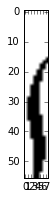

ratioLeft = [ 0.37142857]; ratioRight = [ 0.54285714]; ratioLR = [ 0.68421053]; type = 0


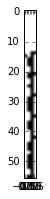

ratioLeft = [ 0.]; ratioRight = [ 0.07692308]; ratioLR = [ 0.]; type = 0


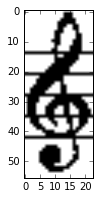

ratioLeft = [ 2.21212121]; ratioRight = [ 3.77272727]; ratioLR = [ 0.58634538]; type = 0


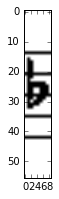

ratioLeft = [ 0.]; ratioRight = [ 2.8]; ratioLR = [ 0.]; type = 0


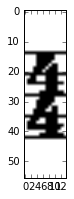

ratioLeft = [ 2.41509434]; ratioRight = [ 0.88679245]; ratioLR = [ 2.72340426]; type = 0


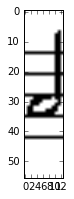

ratioLeft = [ 1.38888889]; ratioRight = [ 0.09259259]; ratioLR = [ 15.]; type = 0


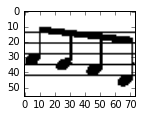

ratioLeft = [ 20.34146341]; ratioRight = [ 0.26829268]; ratioLR = [ 75.81818182]; type = 0


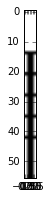

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


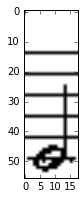

ratioLeft = [ 2.78378378]; ratioRight = [ 0.64864865]; ratioLR = [ 4.29166667]; type = 0


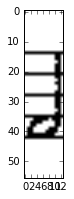

ratioLeft = [ 1.53061224]; ratioRight = [ 0.10204082]; ratioLR = [ 15.]; type = 0


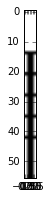

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


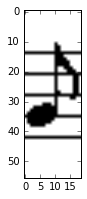

ratioLeft = [ 2.42857143]; ratioRight = [ 2.17142857]; ratioLR = [ 1.11842105]; type = 0


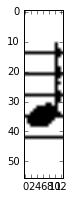

ratioLeft = [ 2.34285714]; ratioRight = [ 0.57142857]; ratioLR = [ 4.1]; type = 0


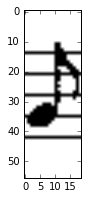

ratioLeft = [ 2.37142857]; ratioRight = [ 2.31428571]; ratioLR = [ 1.02469136]; type = 0


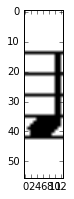

ratioLeft = [ 2.16216216]; ratioRight = [ 0.83783784]; ratioLR = [ 2.58064516]; type = 0


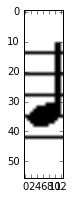

ratioLeft = [ 2.10526316]; ratioRight = [ 0.81578947]; ratioLR = [ 2.58064516]; type = 0


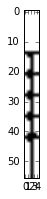

ratioLeft = [ 0.]; ratioRight = [ 0.19642857]; ratioLR = [ 0.]; type = 0


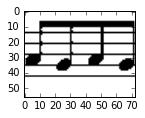

ratioLeft = [ 19.97674419]; ratioRight = [ 0.11627907]; ratioLR = [ 171.8]; type = 0


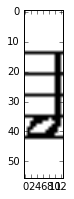

ratioLeft = [ 1.71052632]; ratioRight = [ 0.81578947]; ratioLR = [ 2.09677419]; type = 0


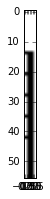

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


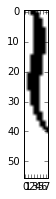

ratioLeft = [ 0.35211268]; ratioRight = [ 0.53521127]; ratioLR = [ 0.65789474]; type = 0


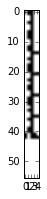

ratioLeft = [ 0.]; ratioRight = [ 0.16923077]; ratioLR = [ 0.]; type = 0


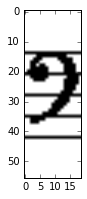

ratioLeft = [ 3.84375]; ratioRight = [ 1.875]; ratioLR = [ 2.05]; type = 0


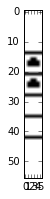

ratioLeft = [ 0.40909091]; ratioRight = [ 0.63636364]; ratioLR = [ 0.64285714]; type = 0


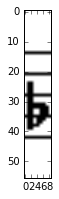

ratioLeft = [ 0.]; ratioRight = [ 1.36842105]; ratioLR = [ 0.]; type = 0


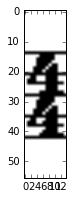

ratioLeft = [ 2.24074074]; ratioRight = [ 0.85185185]; ratioLR = [ 2.63043478]; type = 0


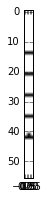

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


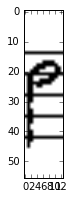

ratioLeft = [ 0.]; ratioRight = [ 3.48387097]; ratioLR = [ 0.]; type = 0


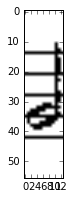

ratioLeft = [ 2.14285714]; ratioRight = [ 0.62857143]; ratioLR = [ 3.40909091]; type = 0


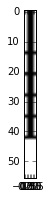

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


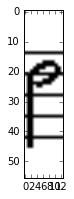

ratioLeft = [ 0.]; ratioRight = [ 1.62264151]; ratioLR = [ 0.]; type = 0


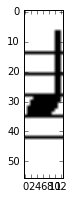

ratioLeft = [ 2.21052632]; ratioRight = [ 0.81578947]; ratioLR = [ 2.70967742]; type = 0


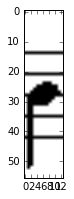

ratioLeft = [ 0.]; ratioRight = [ 1.75925926]; ratioLR = [ 0.]; type = 0


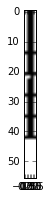

ratioLeft = [ 0.]; ratioRight = [ 0.05882353]; ratioLR = [ 0.]; type = 0


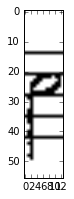

ratioLeft = [ 0.]; ratioRight = [ 1.9047619]; ratioLR = [ 0.]; type = 0


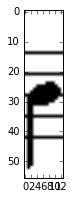

ratioLeft = [ 0.]; ratioRight = [ 1.81481481]; ratioLR = [ 0.]; type = 0


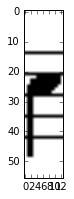

ratioLeft = [ 0.]; ratioRight = [ 1.7962963]; ratioLR = [ 0.]; type = 0


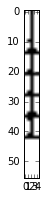

ratioLeft = [ 0.]; ratioRight = [ 0.21818182]; ratioLR = [ 0.]; type = 0


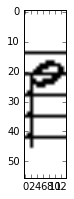

ratioLeft = [ 0.]; ratioRight = [ 2.79411765]; ratioLR = [ 0.]; type = 0


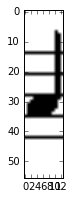

ratioLeft = [ 2.23684211]; ratioRight = [ 0.76315789]; ratioLR = [ 2.93103448]; type = 0


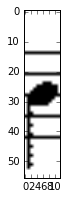

ratioLeft = [ 0.]; ratioRight = [ 3.25]; ratioLR = [ 0.]; type = 0


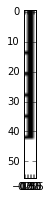

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


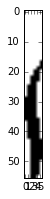

ratioLeft = [ 0.25714286]; ratioRight = [ 0.48571429]; ratioLR = [ 0.52941176]; type = 0


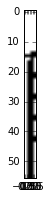

ratioLeft = [ 0.]; ratioRight = [ 0.12195122]; ratioLR = [ 0.]; type = 0


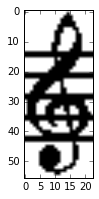

ratioLeft = [ 2.48571429]; ratioRight = [ 4.08571429]; ratioLR = [ 0.60839161]; type = 0


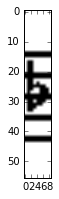

ratioLeft = [ 0.]; ratioRight = [ 3.03030303]; ratioLR = [ 0.]; type = 0


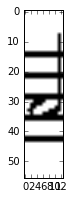

ratioLeft = [ 2.53488372]; ratioRight = [ 0.23255814]; ratioLR = [ 10.9]; type = 0


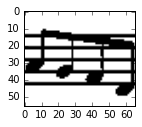

ratioLeft = [ 20.625]; ratioRight = [ 0.8125]; ratioLR = [ 25.38461538]; type = 0


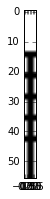

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


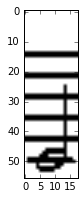

ratioLeft = [ 3.6]; ratioRight = [ 1.]; ratioLR = [ 3.6]; type = 0


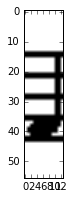

ratioLeft = [ 2.69767442]; ratioRight = [ 0.86046512]; ratioLR = [ 3.13513514]; type = 0


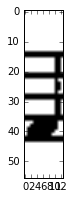

ratioLeft = [ 2.78571429]; ratioRight = [ 0.78571429]; ratioLR = [ 3.54545455]; type = 0


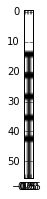

ratioLeft = [ 0.]; ratioRight = [ 0.19230769]; ratioLR = [ 0.]; type = 0


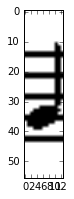

ratioLeft = [ 2.73809524]; ratioRight = [ 0.83333333]; ratioLR = [ 3.28571429]; type = 0


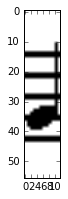

ratioLeft = [ 2.82926829]; ratioRight = [ 0.24390244]; ratioLR = [ 11.6]; type = 0


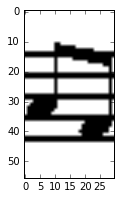

ratioLeft = [ 8.93181818]; ratioRight = [ 0.22727273]; ratioLR = [ 39.3]; type = 0


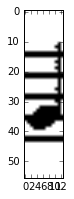

ratioLeft = [ 2.7826087]; ratioRight = [ 0.2173913]; ratioLR = [ 12.8]; type = 0


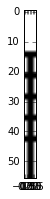

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


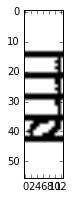

ratioLeft = [ 2.24489796]; ratioRight = [ 0.20408163]; ratioLR = [ 11.]; type = 0


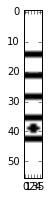

ratioLeft = [ 0.42307692]; ratioRight = [ 0.80769231]; ratioLR = [ 0.52380952]; type = 0


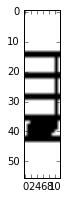

ratioLeft = [ 2.83333333]; ratioRight = [ 0.23809524]; ratioLR = [ 11.9]; type = 0


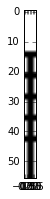

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


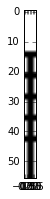

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


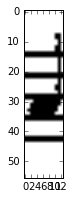

ratioLeft = [ 2.70833333]; ratioRight = [ 0.20833333]; ratioLR = [ 13.]; type = 0


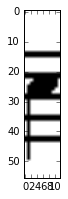

ratioLeft = [ 0.]; ratioRight = [ 3.61538462]; ratioLR = [ 0.]; type = 0


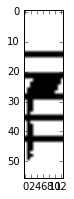

ratioLeft = [ 0.]; ratioRight = [ 4.39473684]; ratioLR = [ 0.]; type = 0


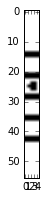

ratioLeft = [ 0.42307692]; ratioRight = [ 0.38461538]; ratioLR = [ 1.1]; type = 0


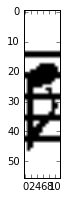

ratioLeft = [ 0.]; ratioRight = [ 2.69642857]; ratioLR = [ 0.]; type = 0


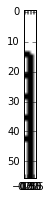

ratioLeft = [ 0.]; ratioRight = [ 0.78846154]; ratioLR = [ 0.]; type = 0


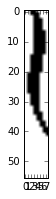

ratioLeft = [ 0.36619718]; ratioRight = [ 0.53521127]; ratioLR = [ 0.68421053]; type = 0


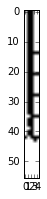

ratioLeft = [ 0.]; ratioRight = [ 0.13253012]; ratioLR = [ 0.]; type = 0


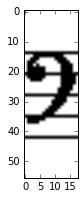

ratioLeft = [ 3.41176471]; ratioRight = [ 1.73529412]; ratioLR = [ 1.96610169]; type = 0


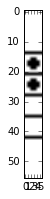

ratioLeft = [ 0.34615385]; ratioRight = [ 0.53846154]; ratioLR = [ 0.64285714]; type = 0


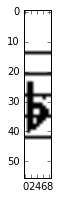

ratioLeft = [ 0.]; ratioRight = [ 2.84]; ratioLR = [ 0.]; type = 0


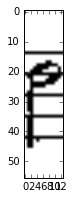

ratioLeft = [ 0.]; ratioRight = [ 1.85416667]; ratioLR = [ 0.]; type = 0


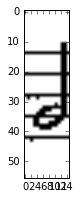

ratioLeft = [ 2.45714286]; ratioRight = [ 0.88571429]; ratioLR = [ 2.77419355]; type = 0


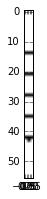

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


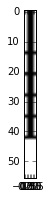

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


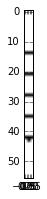

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


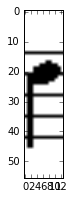

ratioLeft = [ 0.]; ratioRight = [ 1.84615385]; ratioLR = [ 0.]; type = 0


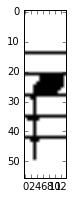

ratioLeft = [ 0.17142857]; ratioRight = [ 2.88571429]; ratioLR = [ 0.05940594]; type = 0


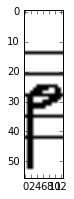

ratioLeft = [ 0.]; ratioRight = [ 1.6]; ratioLR = [ 0.]; type = 0


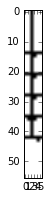

ratioLeft = [ 0.]; ratioRight = [ 0.40816327]; ratioLR = [ 0.]; type = 0


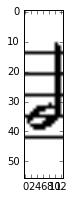

ratioLeft = [ 2.05714286]; ratioRight = [ 0.85714286]; ratioLR = [ 2.4]; type = 0


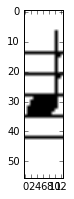

ratioLeft = [ 2.21052632]; ratioRight = [ 0.31578947]; ratioLR = [ 7.]; type = 0


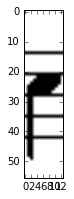

ratioLeft = [ 0.]; ratioRight = [ 1.7962963]; ratioLR = [ 0.]; type = 0


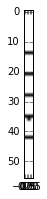

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


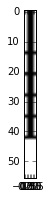

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


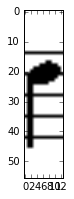

ratioLeft = [ 0.]; ratioRight = [ 1.81132075]; ratioLR = [ 0.]; type = 0


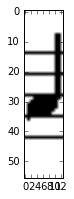

ratioLeft = [ 2.32432432]; ratioRight = [ 0.78378378]; ratioLR = [ 2.96551724]; type = 0


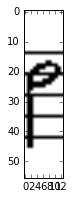

ratioLeft = [ 0.]; ratioRight = [ 1.65384615]; ratioLR = [ 0.]; type = 0


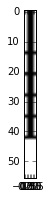

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


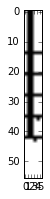

ratioLeft = [ 0.]; ratioRight = [ 0.19767442]; ratioLR = [ 0.]; type = 0


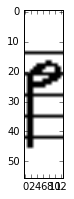

ratioLeft = [ 0.]; ratioRight = [ 1.67924528]; ratioLR = [ 0.]; type = 0


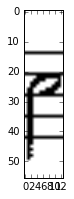

ratioLeft = [ 0.]; ratioRight = [ 3.38709677]; ratioLR = [ 0.]; type = 0


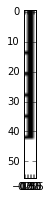

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


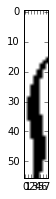

ratioLeft = [ 0.37142857]; ratioRight = [ 0.52857143]; ratioLR = [ 0.7027027]; type = 0


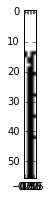

ratioLeft = [ 0.]; ratioRight = [ 0.0617284]; ratioLR = [ 0.]; type = 0


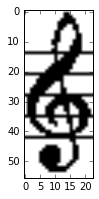

ratioLeft = [ 2.19402985]; ratioRight = [ 3.70149254]; ratioLR = [ 0.59274194]; type = 0


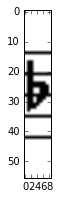

ratioLeft = [ 0.]; ratioRight = [ 2.88]; ratioLR = [ 0.]; type = 0


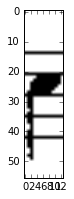

ratioLeft = [ 0.]; ratioRight = [ 2.06382979]; ratioLR = [ 0.]; type = 0


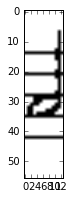

ratioLeft = [ 1.72093023]; ratioRight = [ 0.11627907]; ratioLR = [ 14.8]; type = 0


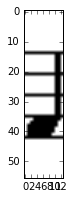

ratioLeft = [ 2.36111111]; ratioRight = [ 0.80555556]; ratioLR = [ 2.93103448]; type = 0


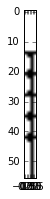

ratioLeft = [ 0.]; ratioRight = [ 0.09090909]; ratioLR = [ 0.]; type = 0


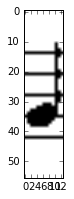

ratioLeft = [ 2.42857143]; ratioRight = [ 0.48571429]; ratioLR = [ 5.]; type = 0


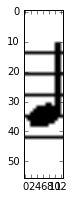

ratioLeft = [ 2.18918919]; ratioRight = [ 0.83783784]; ratioLR = [ 2.61290323]; type = 0


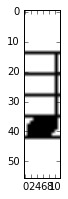

ratioLeft = [ 2.2972973]; ratioRight = [ 0.13513514]; ratioLR = [ 17.]; type = 0


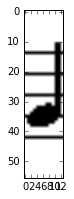

ratioLeft = [ 2.21621622]; ratioRight = [ 0.83783784]; ratioLR = [ 2.64516129]; type = 0


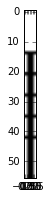

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


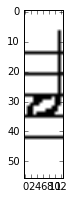

ratioLeft = [ 1.97297297]; ratioRight = [ 0.13513514]; ratioLR = [ 14.6]; type = 0


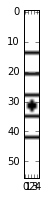

ratioLeft = [ 0.]; ratioRight = [ 0.75]; ratioLR = [ 0.]; type = 0


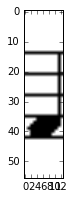

ratioLeft = [ 2.57142857]; ratioRight = [ 0.14285714]; ratioLR = [ 18.]; type = 0


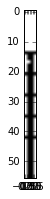

ratioLeft = [ 0.]; ratioRight = [ 0.06024096]; ratioLR = [ 0.]; type = 0


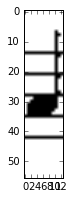

ratioLeft = [ 2.23684211]; ratioRight = [ 0.36842105]; ratioLR = [ 6.07142857]; type = 0


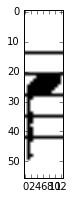

ratioLeft = [ 0.]; ratioRight = [ 3.59375]; ratioLR = [ 0.]; type = 0


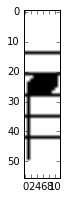

ratioLeft = [ 0.]; ratioRight = [ 3.03030303]; ratioLR = [ 0.]; type = 0


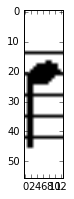

ratioLeft = [ 0.]; ratioRight = [ 1.77358491]; ratioLR = [ 0.]; type = 0


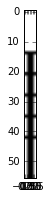

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


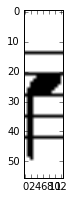

ratioLeft = [ 0.]; ratioRight = [ 1.83018868]; ratioLR = [ 0.]; type = 0


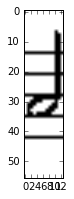

ratioLeft = [ 1.78378378]; ratioRight = [ 0.78378378]; ratioLR = [ 2.27586207]; type = 0


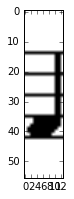

ratioLeft = [ 2.21621622]; ratioRight = [ 0.83783784]; ratioLR = [ 2.64516129]; type = 0


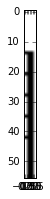

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


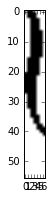

ratioLeft = [ 0.2739726]; ratioRight = [ 0.53424658]; ratioLR = [ 0.51282051]; type = 0


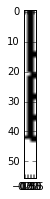

ratioLeft = [ 0.]; ratioRight = [ 0.11627907]; ratioLR = [ 0.]; type = 0


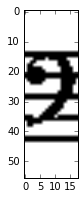

ratioLeft = [ 3.68292683]; ratioRight = [ 1.92682927]; ratioLR = [ 1.91139241]; type = 0


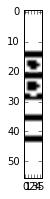

ratioLeft = [ 0.5]; ratioRight = [ 0.73333333]; ratioLR = [ 0.68181818]; type = 0


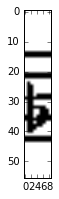

ratioLeft = [ 0.]; ratioRight = [ 3.03125]; ratioLR = [ 0.]; type = 0


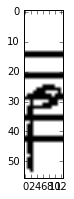

ratioLeft = [ 0.]; ratioRight = [ 2.36363636]; ratioLR = [ 0.]; type = 0


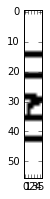

ratioLeft = [ 0.]; ratioRight = [ 1.91666667]; ratioLR = [ 0.]; type = 0


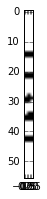

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


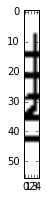

ratioLeft = [ 0.27906977]; ratioRight = [ 0.23255814]; ratioLR = [ 1.2]; type = 0


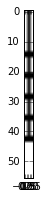

ratioLeft = [ 0.]; ratioRight = [ 0.18518519]; ratioLR = [ 0.]; type = 0


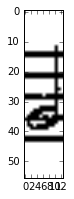

ratioLeft = [ 2.54761905]; ratioRight = [ 0.5]; ratioLR = [ 5.0952381]; type = 0


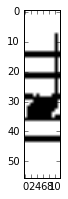

ratioLeft = [ 2.66666667]; ratioRight = [ 0.23809524]; ratioLR = [ 11.2]; type = 0


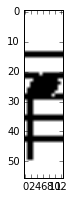

ratioLeft = [ 0.]; ratioRight = [ 2.37931034]; ratioLR = [ 0.]; type = 0


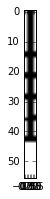

ratioLeft = [ 0.]; ratioRight = [ 0.11363636]; ratioLR = [ 0.]; type = 0


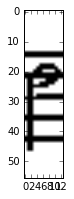

ratioLeft = [ 0.]; ratioRight = [ 2.32142857]; ratioLR = [ 0.]; type = 0


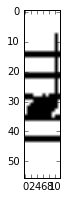

ratioLeft = [ 2.69047619]; ratioRight = [ 0.23809524]; ratioLR = [ 11.3]; type = 0


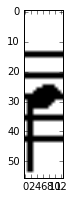

ratioLeft = [ 0.]; ratioRight = [ 2.3]; ratioLR = [ 0.]; type = 0


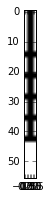

ratioLeft = [ 0.]; ratioRight = [ 0.11363636]; ratioLR = [ 0.]; type = 0


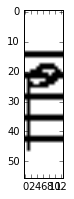

ratioLeft = [ 0.]; ratioRight = [ 3.76315789]; ratioLR = [ 0.]; type = 0


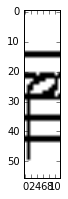

ratioLeft = [ 0.]; ratioRight = [ 3.]; ratioLR = [ 0.]; type = 0


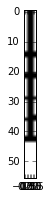

ratioLeft = [ 0.]; ratioRight = [ 0.10227273]; ratioLR = [ 0.]; type = 0


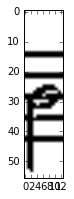

ratioLeft = [ 0.]; ratioRight = [ 2.18644068]; ratioLR = [ 0.]; type = 0


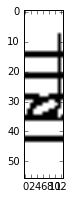

ratioLeft = [ 2.57142857]; ratioRight = [ 0.23809524]; ratioLR = [ 10.8]; type = 0


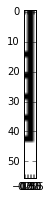

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


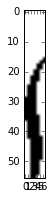

ratioLeft = [ 0.25714286]; ratioRight = [ 0.55714286]; ratioLR = [ 0.46153846]; type = 0


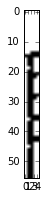

ratioLeft = [ 0.]; ratioRight = [ 0.225]; ratioLR = [ 0.]; type = 0


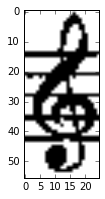

ratioLeft = [ 2.79104478]; ratioRight = [ 4.08955224]; ratioLR = [ 0.68248175]; type = 0


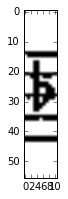

ratioLeft = [ 0.39130435]; ratioRight = [ 1.56521739]; ratioLR = [ 0.25]; type = 0


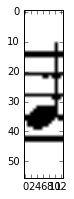

ratioLeft = [ 2.55]; ratioRight = [ 0.45]; ratioLR = [ 5.66666667]; type = 0


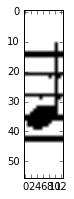

ratioLeft = [ 2.61538462]; ratioRight = [ 0.46153846]; ratioLR = [ 5.66666667]; type = 0


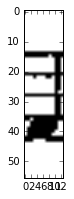

ratioLeft = [ 2.475]; ratioRight = [ 0.8]; ratioLR = [ 3.09375]; type = 0


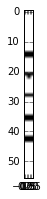

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


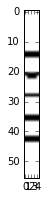

ratioLeft = [ 0.5]; ratioRight = [ 0.44444444]; ratioLR = [ 1.125]; type = 0


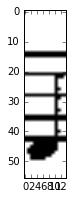

ratioLeft = [ 2.625]; ratioRight = [ 0.75]; ratioLR = [ 3.5]; type = 0


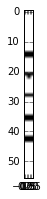

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


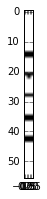

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


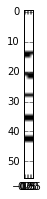

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


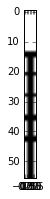

ratioLeft = [ 0.]; ratioRight = [ 0.0952381]; ratioLR = [ 0.]; type = 0


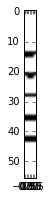

ratioLeft = [ 0.]; ratioRight = [ 0.38888889]; ratioLR = [ 0.]; type = 0


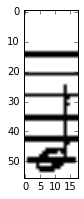

ratioLeft = [ 3.33333333]; ratioRight = [ 0.97619048]; ratioLR = [ 3.41463415]; type = 0


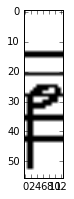

ratioLeft = [ 0.]; ratioRight = [ 2.05263158]; ratioLR = [ 0.]; type = 0


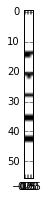

ratioLeft = [ 0.]; ratioRight = [ 0.41176471]; ratioLR = [ 0.]; type = 0


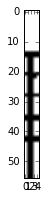

ratioLeft = [ 0.]; ratioRight = [ 0.20238095]; ratioLR = [ 0.]; type = 0


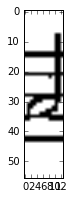

ratioLeft = [ 2.]; ratioRight = [ 0.85365854]; ratioLR = [ 2.34285714]; type = 0


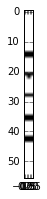

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


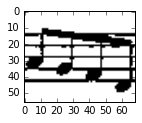

ratioLeft = [ 19.41304348]; ratioRight = [ 0.89130435]; ratioLR = [ 21.7804878]; type = 0


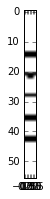

ratioLeft = [ 0.]; ratioRight = [ 0.44444444]; ratioLR = [ 0.]; type = 0


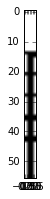

ratioLeft = [ 0.]; ratioRight = [ 0.0952381]; ratioLR = [ 0.]; type = 0


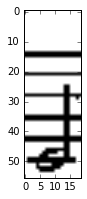

ratioLeft = [ 2.62068966]; ratioRight = [ 0.63793103]; ratioLR = [ 4.10810811]; type = 0


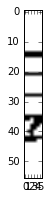

ratioLeft = [ 0.40909091]; ratioRight = [ 0.77272727]; ratioLR = [ 0.52941176]; type = 0


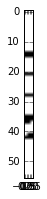

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


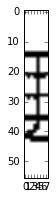

ratioLeft = [ 0.51219512]; ratioRight = [ 0.63414634]; ratioLR = [ 0.80769231]; type = 0


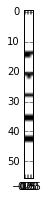

ratioLeft = [ 0.]; ratioRight = [ 0.41176471]; ratioLR = [ 0.]; type = 0


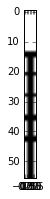

ratioLeft = [ 0.]; ratioRight = [ 0.0952381]; ratioLR = [ 0.]; type = 0


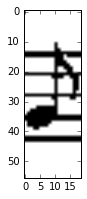

ratioLeft = [ 2.46341463]; ratioRight = [ 2.29268293]; ratioLR = [ 1.07446809]; type = 0


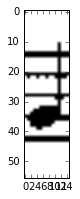

ratioLeft = [ 2.73170732]; ratioRight = [ 0.65853659]; ratioLR = [ 4.14814815]; type = 0


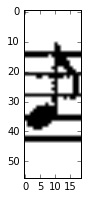

ratioLeft = [ 2.28888889]; ratioRight = [ 2.24444444]; ratioLR = [ 1.01980198]; type = 0


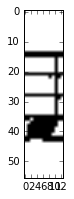

ratioLeft = [ 2.53846154]; ratioRight = [ 0.46153846]; ratioLR = [ 5.5]; type = 0


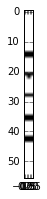

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


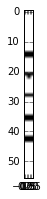

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


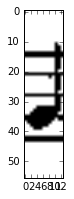

ratioLeft = [ 2.63157895]; ratioRight = [ 0.84210526]; ratioLR = [ 3.125]; type = 0


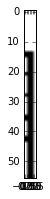

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


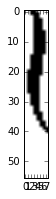

ratioLeft = [ 0.38028169]; ratioRight = [ 0.52112676]; ratioLR = [ 0.72972973]; type = 0


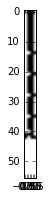

ratioLeft = [ 0.]; ratioRight = [ 0.0625]; ratioLR = [ 0.]; type = 0


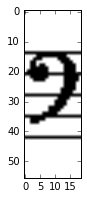

ratioLeft = [ 3.58823529]; ratioRight = [ 1.67647059]; ratioLR = [ 2.14035088]; type = 0


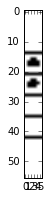

ratioLeft = [ 0.40909091]; ratioRight = [ 0.59090909]; ratioLR = [ 0.69230769]; type = 0


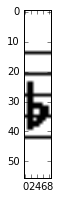

ratioLeft = [ 0.]; ratioRight = [ 1.36842105]; ratioLR = [ 0.]; type = 0


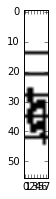

ratioLeft = [ 1.76666667]; ratioRight = [ 0.16666667]; ratioLR = [ 10.6]; type = 0


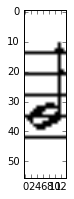

ratioLeft = [ 2.16216216]; ratioRight = [ 0.32432432]; ratioLR = [ 6.66666667]; type = 0


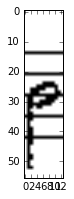

ratioLeft = [ 0.]; ratioRight = [ 3.375]; ratioLR = [ 0.]; type = 0


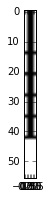

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


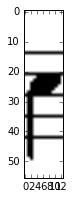

ratioLeft = [ 0.]; ratioRight = [ 1.86538462]; ratioLR = [ 0.]; type = 0


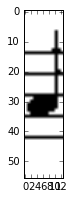

ratioLeft = [ 2.12820513]; ratioRight = [ 0.30769231]; ratioLR = [ 6.91666667]; type = 0


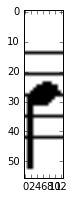

ratioLeft = [ 0.]; ratioRight = [ 1.72727273]; ratioLR = [ 0.]; type = 0


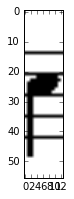

ratioLeft = [ 0.]; ratioRight = [ 1.72727273]; ratioLR = [ 0.]; type = 0


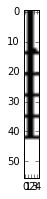

ratioLeft = [ 0.]; ratioRight = [ 0.12790698]; ratioLR = [ 0.]; type = 0


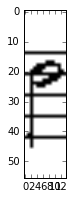

ratioLeft = [ 0.]; ratioRight = [ 2.84848485]; ratioLR = [ 0.]; type = 0


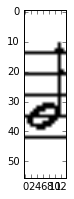

ratioLeft = [ 2.27777778]; ratioRight = [ 0.33333333]; ratioLR = [ 6.83333333]; type = 0


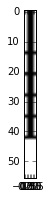

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


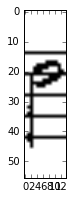

ratioLeft = [ 0.]; ratioRight = [ 2.74285714]; ratioLR = [ 0.]; type = 0


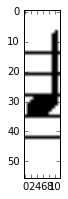

ratioLeft = [ 1.55555556]; ratioRight = [ 0.09259259]; ratioLR = [ 16.8]; type = 0


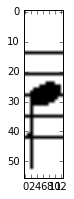

ratioLeft = [ 0.]; ratioRight = [ 2.88235294]; ratioLR = [ 0.]; type = 0


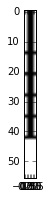

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


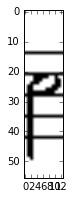

ratioLeft = [ 0.]; ratioRight = [ 1.46296296]; ratioLR = [ 0.]; type = 0


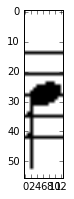

ratioLeft = [ 0.]; ratioRight = [ 2.82857143]; ratioLR = [ 0.]; type = 0


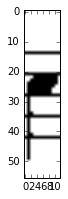

ratioLeft = [ 0.]; ratioRight = [ 3.03030303]; ratioLR = [ 0.]; type = 0


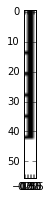

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


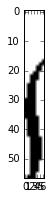

ratioLeft = [ 0.26760563]; ratioRight = [ 0.52112676]; ratioLR = [ 0.51351351]; type = 0


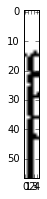

ratioLeft = [ 0.]; ratioRight = [ 0.1875]; ratioLR = [ 0.]; type = 0


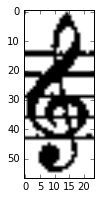

ratioLeft = [ 2.36764706]; ratioRight = [ 3.94117647]; ratioLR = [ 0.60074627]; type = 0


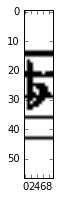

ratioLeft = [ 0.]; ratioRight = [ 3.25]; ratioLR = [ 0.]; type = 0


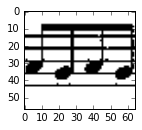

ratioLeft = [ 19.86666667]; ratioRight = [ 0.62222222]; ratioLR = [ 31.92857143]; type = 0


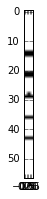

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


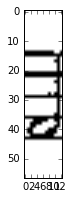

ratioLeft = [ 2.3]; ratioRight = [ 0.175]; ratioLR = [ 13.14285714]; type = 0


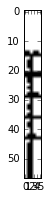

ratioLeft = [ 0.]; ratioRight = [ 0.31081081]; ratioLR = [ 0.]; type = 0


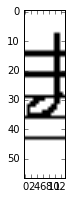

ratioLeft = [ 2.10526316]; ratioRight = [ 1.07894737]; ratioLR = [ 1.95121951]; type = 0


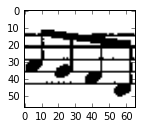

ratioLeft = [ 17.65957447]; ratioRight = [ 0.78723404]; ratioLR = [ 22.43243243]; type = 0


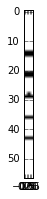

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


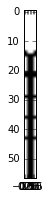

ratioLeft = [ 0.]; ratioRight = [ 0.08333333]; ratioLR = [ 0.]; type = 0


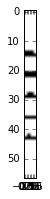

ratioLeft = [ 0.]; ratioRight = [ 0.875]; ratioLR = [ 0.]; type = 0


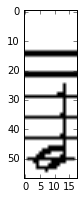

ratioLeft = [ 2.69565217]; ratioRight = [ 0.67391304]; ratioLR = [ 4.]; type = 0


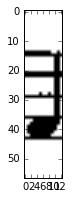

ratioLeft = [ 2.68421053]; ratioRight = [ 0.84210526]; ratioLR = [ 3.1875]; type = 0


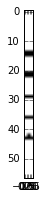

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


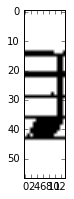

ratioLeft = [ 2.84210526]; ratioRight = [ 0.84210526]; ratioLR = [ 3.375]; type = 0


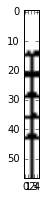

ratioLeft = [ 0.]; ratioRight = [ 0.33333333]; ratioLR = [ 0.]; type = 0


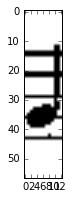

ratioLeft = [ 2.75675676]; ratioRight = [ 0.81081081]; ratioLR = [ 3.4]; type = 0


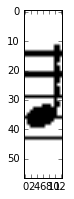

ratioLeft = [ 2.72972973]; ratioRight = [ 0.72972973]; ratioLR = [ 3.74074074]; type = 0


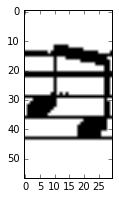

ratioLeft = [ 7.975]; ratioRight = [ 0.7]; ratioLR = [ 11.39285714]; type = 0


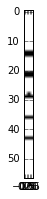

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


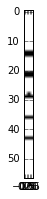

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


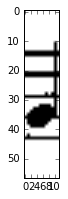

ratioLeft = [ 2.71052632]; ratioRight = [ 0.18421053]; ratioLR = [ 14.71428571]; type = 0


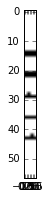

ratioLeft = [ 0.]; ratioRight = [ 0.4375]; ratioLR = [ 0.]; type = 0


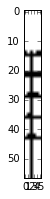

ratioLeft = [ 0.]; ratioRight = [ 0.44230769]; ratioLR = [ 0.]; type = 0


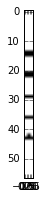

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


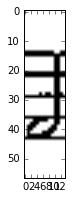

ratioLeft = [ 2.2972973]; ratioRight = [ 1.08108108]; ratioLR = [ 2.125]; type = 0


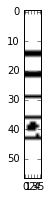

ratioLeft = [ 0.45]; ratioRight = [ 0.8]; ratioLR = [ 0.5625]; type = 0


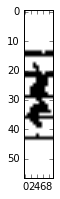

ratioLeft = [ 0.51162791]; ratioRight = [ 1.48837209]; ratioLR = [ 0.34375]; type = 0


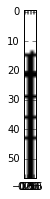

ratioLeft = [ 0.]; ratioRight = [ 0.07058824]; ratioLR = [ 0.]; type = 0


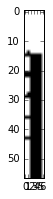

ratioLeft = [ 1.0952381]; ratioRight = [ 0.]; ratioLR = [ inf]; type = 0


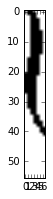

ratioLeft = [ 0.26388889]; ratioRight = [ 0.52777778]; ratioLR = [ 0.5]; type = 0


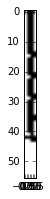

ratioLeft = [ 0.]; ratioRight = [ 0.12048193]; ratioLR = [ 0.]; type = 0


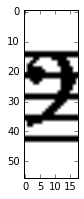

ratioLeft = [ 3.74358974]; ratioRight = [ 2.]; ratioLR = [ 1.87179487]; type = 0


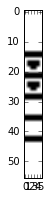

ratioLeft = [ 0.4375]; ratioRight = [ 0.75]; ratioLR = [ 0.58333333]; type = 0


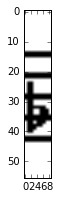

ratioLeft = [ 0.]; ratioRight = [ 1.67391304]; ratioLR = [ 0.]; type = 0


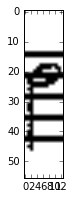

ratioLeft = [ 0.]; ratioRight = [ 2.77083333]; ratioLR = [ 0.]; type = 0


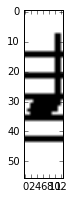

ratioLeft = [ 2.61363636]; ratioRight = [ 0.86363636]; ratioLR = [ 3.02631579]; type = 0


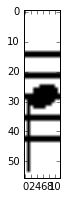

ratioLeft = [ 0.]; ratioRight = [ 3.5]; ratioLR = [ 0.]; type = 0


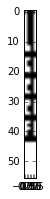

ratioLeft = [ 0.]; ratioRight = [ 0.13333333]; ratioLR = [ 0.]; type = 0


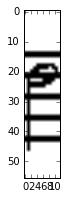

ratioLeft = [ 0.]; ratioRight = [ 3.5]; ratioLR = [ 0.]; type = 0


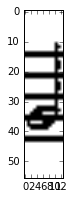

ratioLeft = [ 2.75609756]; ratioRight = [ 0.68292683]; ratioLR = [ 4.03571429]; type = 0


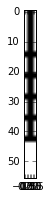

ratioLeft = [ 0.]; ratioRight = [ 0.11363636]; ratioLR = [ 0.]; type = 0


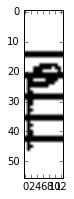

ratioLeft = [ 0.]; ratioRight = [ 4.07894737]; ratioLR = [ 0.]; type = 0


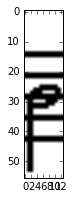

ratioLeft = [ 0.]; ratioRight = [ 2.2295082]; ratioLR = [ 0.]; type = 0


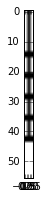

ratioLeft = [ 0.]; ratioRight = [ 0.18518519]; ratioLR = [ 0.]; type = 0


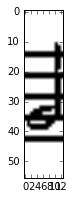

ratioLeft = [ 2.775]; ratioRight = [ 0.9]; ratioLR = [ 3.08333333]; type = 0


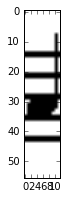

ratioLeft = [ 2.76744186]; ratioRight = [ 0.23255814]; ratioLR = [ 11.9]; type = 0


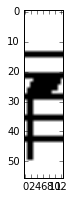

ratioLeft = [ 0.]; ratioRight = [ 2.4137931]; ratioLR = [ 0.]; type = 0


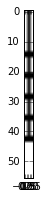

ratioLeft = [ 0.]; ratioRight = [ 0.18518519]; ratioLR = [ 0.]; type = 0


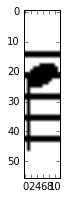

ratioLeft = [ 0.]; ratioRight = [ 3.65789474]; ratioLR = [ 0.]; type = 0


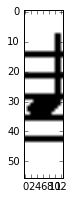

ratioLeft = [ 2.69767442]; ratioRight = [ 0.88372093]; ratioLR = [ 3.05263158]; type = 0


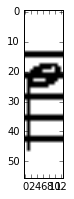

ratioLeft = [ 0.]; ratioRight = [ 3.92105263]; ratioLR = [ 0.]; type = 0


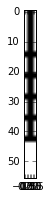

ratioLeft = [ 0.]; ratioRight = [ 0.11363636]; ratioLR = [ 0.]; type = 0


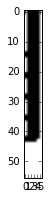

ratioLeft = [ 0.5]; ratioRight = [ 0.48863636]; ratioLR = [ 1.02325581]; type = 0


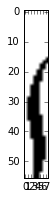

ratioLeft = [ 0.37142857]; ratioRight = [ 0.54285714]; ratioLR = [ 0.68421053]; type = 0


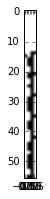

ratioLeft = [ 0.]; ratioRight = [ 0.07692308]; ratioLR = [ 0.]; type = 0


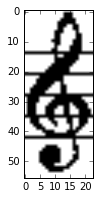

ratioLeft = [ 2.21212121]; ratioRight = [ 3.77272727]; ratioLR = [ 0.58634538]; type = 0


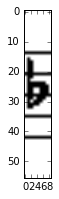

ratioLeft = [ 0.]; ratioRight = [ 2.8]; ratioLR = [ 0.]; type = 0


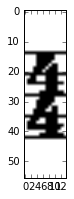

ratioLeft = [ 2.41509434]; ratioRight = [ 0.88679245]; ratioLR = [ 2.72340426]; type = 0


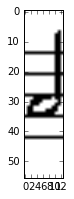

ratioLeft = [ 1.38888889]; ratioRight = [ 0.09259259]; ratioLR = [ 15.]; type = 0


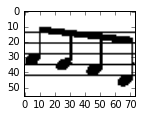

ratioLeft = [ 20.34146341]; ratioRight = [ 0.26829268]; ratioLR = [ 75.81818182]; type = 0


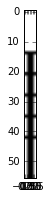

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


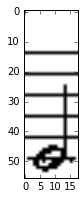

ratioLeft = [ 2.78378378]; ratioRight = [ 0.64864865]; ratioLR = [ 4.29166667]; type = 0


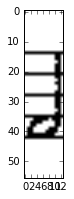

ratioLeft = [ 1.53061224]; ratioRight = [ 0.10204082]; ratioLR = [ 15.]; type = 0


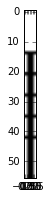

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


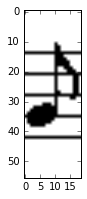

ratioLeft = [ 2.42857143]; ratioRight = [ 2.17142857]; ratioLR = [ 1.11842105]; type = 0


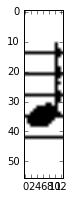

ratioLeft = [ 2.34285714]; ratioRight = [ 0.57142857]; ratioLR = [ 4.1]; type = 0


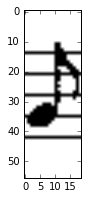

ratioLeft = [ 2.37142857]; ratioRight = [ 2.31428571]; ratioLR = [ 1.02469136]; type = 0


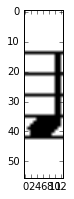

ratioLeft = [ 2.16216216]; ratioRight = [ 0.83783784]; ratioLR = [ 2.58064516]; type = 0


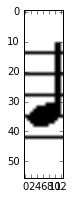

ratioLeft = [ 2.10526316]; ratioRight = [ 0.81578947]; ratioLR = [ 2.58064516]; type = 0


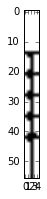

ratioLeft = [ 0.]; ratioRight = [ 0.19642857]; ratioLR = [ 0.]; type = 0


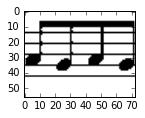

ratioLeft = [ 19.97674419]; ratioRight = [ 0.11627907]; ratioLR = [ 171.8]; type = 0


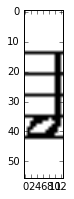

ratioLeft = [ 1.71052632]; ratioRight = [ 0.81578947]; ratioLR = [ 2.09677419]; type = 0


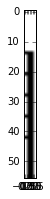

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


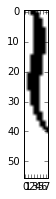

ratioLeft = [ 0.35211268]; ratioRight = [ 0.53521127]; ratioLR = [ 0.65789474]; type = 0


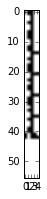

ratioLeft = [ 0.]; ratioRight = [ 0.16923077]; ratioLR = [ 0.]; type = 0


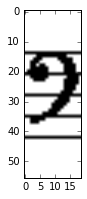

ratioLeft = [ 3.84375]; ratioRight = [ 1.875]; ratioLR = [ 2.05]; type = 0


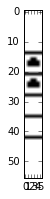

ratioLeft = [ 0.40909091]; ratioRight = [ 0.63636364]; ratioLR = [ 0.64285714]; type = 0


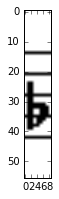

ratioLeft = [ 0.]; ratioRight = [ 1.36842105]; ratioLR = [ 0.]; type = 0


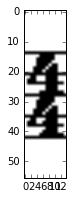

ratioLeft = [ 2.24074074]; ratioRight = [ 0.85185185]; ratioLR = [ 2.63043478]; type = 0


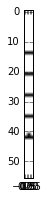

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


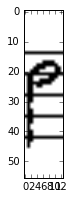

ratioLeft = [ 0.]; ratioRight = [ 3.48387097]; ratioLR = [ 0.]; type = 0


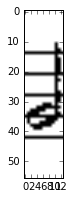

ratioLeft = [ 2.14285714]; ratioRight = [ 0.62857143]; ratioLR = [ 3.40909091]; type = 0


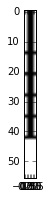

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


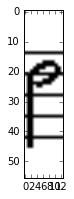

ratioLeft = [ 0.]; ratioRight = [ 1.62264151]; ratioLR = [ 0.]; type = 0


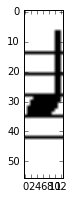

ratioLeft = [ 2.21052632]; ratioRight = [ 0.81578947]; ratioLR = [ 2.70967742]; type = 0


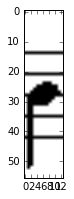

ratioLeft = [ 0.]; ratioRight = [ 1.75925926]; ratioLR = [ 0.]; type = 0


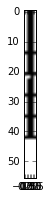

ratioLeft = [ 0.]; ratioRight = [ 0.05882353]; ratioLR = [ 0.]; type = 0


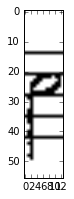

ratioLeft = [ 0.]; ratioRight = [ 1.9047619]; ratioLR = [ 0.]; type = 0


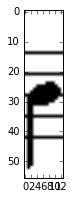

ratioLeft = [ 0.]; ratioRight = [ 1.81481481]; ratioLR = [ 0.]; type = 0


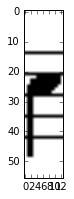

ratioLeft = [ 0.]; ratioRight = [ 1.7962963]; ratioLR = [ 0.]; type = 0


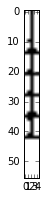

ratioLeft = [ 0.]; ratioRight = [ 0.21818182]; ratioLR = [ 0.]; type = 0


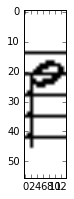

ratioLeft = [ 0.]; ratioRight = [ 2.79411765]; ratioLR = [ 0.]; type = 0


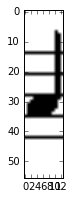

ratioLeft = [ 2.23684211]; ratioRight = [ 0.76315789]; ratioLR = [ 2.93103448]; type = 0


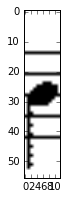

ratioLeft = [ 0.]; ratioRight = [ 3.25]; ratioLR = [ 0.]; type = 0


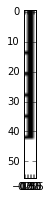

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


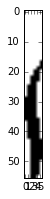

ratioLeft = [ 0.25714286]; ratioRight = [ 0.48571429]; ratioLR = [ 0.52941176]; type = 0


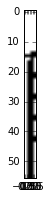

ratioLeft = [ 0.]; ratioRight = [ 0.12195122]; ratioLR = [ 0.]; type = 0


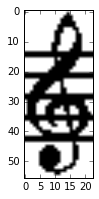

ratioLeft = [ 2.48571429]; ratioRight = [ 4.08571429]; ratioLR = [ 0.60839161]; type = 0


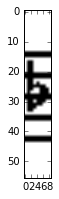

ratioLeft = [ 0.]; ratioRight = [ 3.03030303]; ratioLR = [ 0.]; type = 0


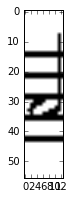

ratioLeft = [ 2.53488372]; ratioRight = [ 0.23255814]; ratioLR = [ 10.9]; type = 0


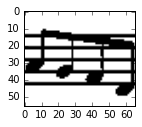

ratioLeft = [ 20.625]; ratioRight = [ 0.8125]; ratioLR = [ 25.38461538]; type = 0


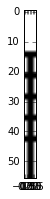

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


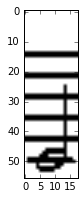

ratioLeft = [ 3.6]; ratioRight = [ 1.]; ratioLR = [ 3.6]; type = 0


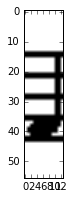

ratioLeft = [ 2.69767442]; ratioRight = [ 0.86046512]; ratioLR = [ 3.13513514]; type = 0


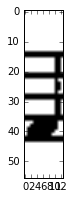

ratioLeft = [ 2.78571429]; ratioRight = [ 0.78571429]; ratioLR = [ 3.54545455]; type = 0


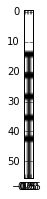

ratioLeft = [ 0.]; ratioRight = [ 0.19230769]; ratioLR = [ 0.]; type = 0


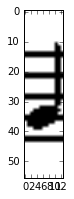

ratioLeft = [ 2.73809524]; ratioRight = [ 0.83333333]; ratioLR = [ 3.28571429]; type = 0


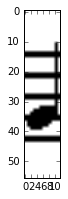

ratioLeft = [ 2.82926829]; ratioRight = [ 0.24390244]; ratioLR = [ 11.6]; type = 0


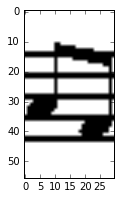

ratioLeft = [ 8.93181818]; ratioRight = [ 0.22727273]; ratioLR = [ 39.3]; type = 0


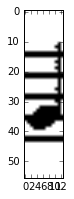

ratioLeft = [ 2.7826087]; ratioRight = [ 0.2173913]; ratioLR = [ 12.8]; type = 0


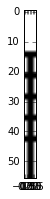

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


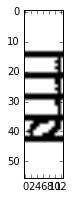

ratioLeft = [ 2.24489796]; ratioRight = [ 0.20408163]; ratioLR = [ 11.]; type = 0


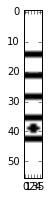

ratioLeft = [ 0.42307692]; ratioRight = [ 0.80769231]; ratioLR = [ 0.52380952]; type = 0


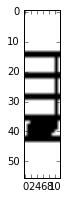

ratioLeft = [ 2.83333333]; ratioRight = [ 0.23809524]; ratioLR = [ 11.9]; type = 0


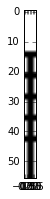

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


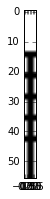

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


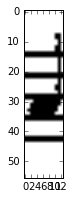

ratioLeft = [ 2.70833333]; ratioRight = [ 0.20833333]; ratioLR = [ 13.]; type = 0


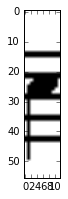

ratioLeft = [ 0.]; ratioRight = [ 3.61538462]; ratioLR = [ 0.]; type = 0


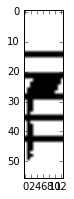

ratioLeft = [ 0.]; ratioRight = [ 4.39473684]; ratioLR = [ 0.]; type = 0


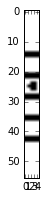

ratioLeft = [ 0.42307692]; ratioRight = [ 0.38461538]; ratioLR = [ 1.1]; type = 0


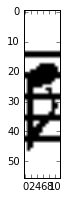

ratioLeft = [ 0.]; ratioRight = [ 2.69642857]; ratioLR = [ 0.]; type = 0


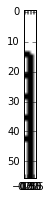

ratioLeft = [ 0.]; ratioRight = [ 0.78846154]; ratioLR = [ 0.]; type = 0


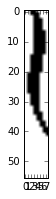

ratioLeft = [ 0.36619718]; ratioRight = [ 0.53521127]; ratioLR = [ 0.68421053]; type = 0


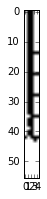

ratioLeft = [ 0.]; ratioRight = [ 0.13253012]; ratioLR = [ 0.]; type = 0


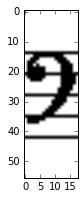

ratioLeft = [ 3.41176471]; ratioRight = [ 1.73529412]; ratioLR = [ 1.96610169]; type = 0


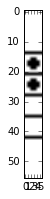

ratioLeft = [ 0.34615385]; ratioRight = [ 0.53846154]; ratioLR = [ 0.64285714]; type = 0


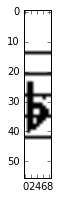

ratioLeft = [ 0.]; ratioRight = [ 2.84]; ratioLR = [ 0.]; type = 0


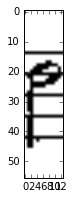

ratioLeft = [ 0.]; ratioRight = [ 1.85416667]; ratioLR = [ 0.]; type = 0


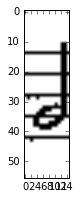

ratioLeft = [ 2.45714286]; ratioRight = [ 0.88571429]; ratioLR = [ 2.77419355]; type = 0


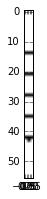

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


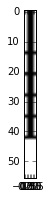

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


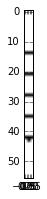

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


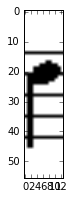

ratioLeft = [ 0.]; ratioRight = [ 1.84615385]; ratioLR = [ 0.]; type = 0


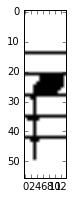

ratioLeft = [ 0.17142857]; ratioRight = [ 2.88571429]; ratioLR = [ 0.05940594]; type = 0


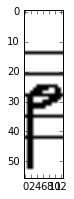

ratioLeft = [ 0.]; ratioRight = [ 1.6]; ratioLR = [ 0.]; type = 0


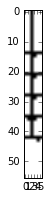

ratioLeft = [ 0.]; ratioRight = [ 0.40816327]; ratioLR = [ 0.]; type = 0


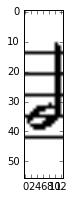

ratioLeft = [ 2.05714286]; ratioRight = [ 0.85714286]; ratioLR = [ 2.4]; type = 0


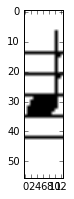

ratioLeft = [ 2.21052632]; ratioRight = [ 0.31578947]; ratioLR = [ 7.]; type = 0


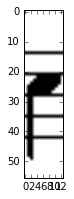

ratioLeft = [ 0.]; ratioRight = [ 1.7962963]; ratioLR = [ 0.]; type = 0


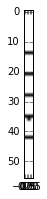

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


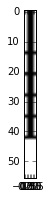

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


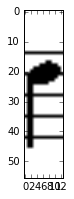

ratioLeft = [ 0.]; ratioRight = [ 1.81132075]; ratioLR = [ 0.]; type = 0


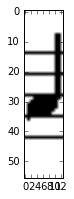

ratioLeft = [ 2.32432432]; ratioRight = [ 0.78378378]; ratioLR = [ 2.96551724]; type = 0


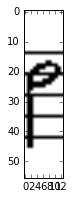

ratioLeft = [ 0.]; ratioRight = [ 1.65384615]; ratioLR = [ 0.]; type = 0


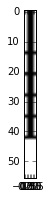

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


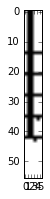

ratioLeft = [ 0.]; ratioRight = [ 0.19767442]; ratioLR = [ 0.]; type = 0


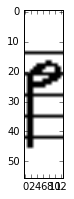

ratioLeft = [ 0.]; ratioRight = [ 1.67924528]; ratioLR = [ 0.]; type = 0


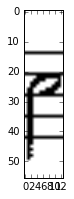

ratioLeft = [ 0.]; ratioRight = [ 3.38709677]; ratioLR = [ 0.]; type = 0


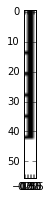

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


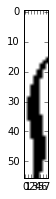

ratioLeft = [ 0.37142857]; ratioRight = [ 0.52857143]; ratioLR = [ 0.7027027]; type = 0


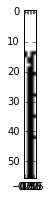

ratioLeft = [ 0.]; ratioRight = [ 0.0617284]; ratioLR = [ 0.]; type = 0


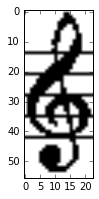

ratioLeft = [ 2.19402985]; ratioRight = [ 3.70149254]; ratioLR = [ 0.59274194]; type = 0


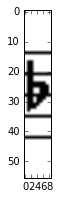

ratioLeft = [ 0.]; ratioRight = [ 2.88]; ratioLR = [ 0.]; type = 0


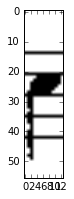

ratioLeft = [ 0.]; ratioRight = [ 2.06382979]; ratioLR = [ 0.]; type = 0


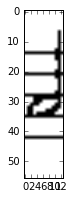

ratioLeft = [ 1.72093023]; ratioRight = [ 0.11627907]; ratioLR = [ 14.8]; type = 0


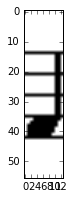

ratioLeft = [ 2.36111111]; ratioRight = [ 0.80555556]; ratioLR = [ 2.93103448]; type = 0


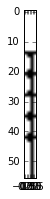

ratioLeft = [ 0.]; ratioRight = [ 0.09090909]; ratioLR = [ 0.]; type = 0


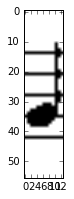

ratioLeft = [ 2.42857143]; ratioRight = [ 0.48571429]; ratioLR = [ 5.]; type = 0


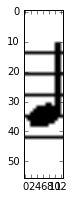

ratioLeft = [ 2.18918919]; ratioRight = [ 0.83783784]; ratioLR = [ 2.61290323]; type = 0


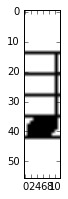

ratioLeft = [ 2.2972973]; ratioRight = [ 0.13513514]; ratioLR = [ 17.]; type = 0


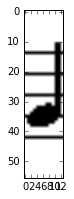

ratioLeft = [ 2.21621622]; ratioRight = [ 0.83783784]; ratioLR = [ 2.64516129]; type = 0


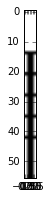

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


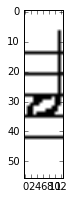

ratioLeft = [ 1.97297297]; ratioRight = [ 0.13513514]; ratioLR = [ 14.6]; type = 0


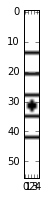

ratioLeft = [ 0.]; ratioRight = [ 0.75]; ratioLR = [ 0.]; type = 0


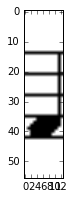

ratioLeft = [ 2.57142857]; ratioRight = [ 0.14285714]; ratioLR = [ 18.]; type = 0


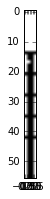

ratioLeft = [ 0.]; ratioRight = [ 0.06024096]; ratioLR = [ 0.]; type = 0


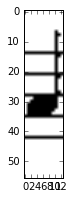

ratioLeft = [ 2.23684211]; ratioRight = [ 0.36842105]; ratioLR = [ 6.07142857]; type = 0


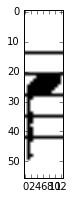

ratioLeft = [ 0.]; ratioRight = [ 3.59375]; ratioLR = [ 0.]; type = 0


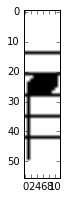

ratioLeft = [ 0.]; ratioRight = [ 3.03030303]; ratioLR = [ 0.]; type = 0


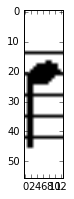

ratioLeft = [ 0.]; ratioRight = [ 1.77358491]; ratioLR = [ 0.]; type = 0


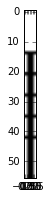

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


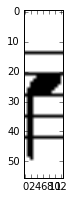

ratioLeft = [ 0.]; ratioRight = [ 1.83018868]; ratioLR = [ 0.]; type = 0


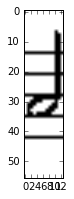

ratioLeft = [ 1.78378378]; ratioRight = [ 0.78378378]; ratioLR = [ 2.27586207]; type = 0


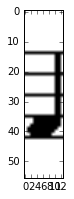

ratioLeft = [ 2.21621622]; ratioRight = [ 0.83783784]; ratioLR = [ 2.64516129]; type = 0


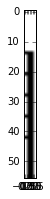

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


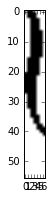

ratioLeft = [ 0.2739726]; ratioRight = [ 0.53424658]; ratioLR = [ 0.51282051]; type = 0


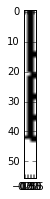

ratioLeft = [ 0.]; ratioRight = [ 0.11627907]; ratioLR = [ 0.]; type = 0


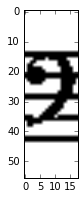

ratioLeft = [ 3.68292683]; ratioRight = [ 1.92682927]; ratioLR = [ 1.91139241]; type = 0


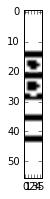

ratioLeft = [ 0.5]; ratioRight = [ 0.73333333]; ratioLR = [ 0.68181818]; type = 0


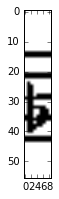

ratioLeft = [ 0.]; ratioRight = [ 3.03125]; ratioLR = [ 0.]; type = 0


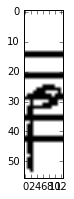

ratioLeft = [ 0.]; ratioRight = [ 2.36363636]; ratioLR = [ 0.]; type = 0


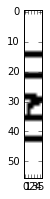

ratioLeft = [ 0.]; ratioRight = [ 1.91666667]; ratioLR = [ 0.]; type = 0


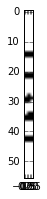

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


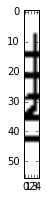

ratioLeft = [ 0.27906977]; ratioRight = [ 0.23255814]; ratioLR = [ 1.2]; type = 0


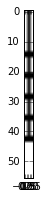

ratioLeft = [ 0.]; ratioRight = [ 0.18518519]; ratioLR = [ 0.]; type = 0


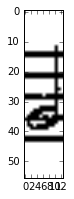

ratioLeft = [ 2.54761905]; ratioRight = [ 0.5]; ratioLR = [ 5.0952381]; type = 0


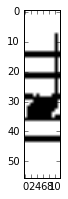

ratioLeft = [ 2.66666667]; ratioRight = [ 0.23809524]; ratioLR = [ 11.2]; type = 0


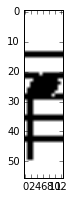

ratioLeft = [ 0.]; ratioRight = [ 2.37931034]; ratioLR = [ 0.]; type = 0


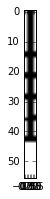

ratioLeft = [ 0.]; ratioRight = [ 0.11363636]; ratioLR = [ 0.]; type = 0


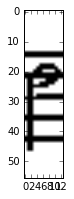

ratioLeft = [ 0.]; ratioRight = [ 2.32142857]; ratioLR = [ 0.]; type = 0


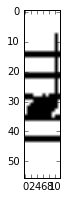

ratioLeft = [ 2.69047619]; ratioRight = [ 0.23809524]; ratioLR = [ 11.3]; type = 0


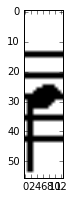

ratioLeft = [ 0.]; ratioRight = [ 2.3]; ratioLR = [ 0.]; type = 0


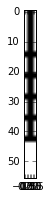

ratioLeft = [ 0.]; ratioRight = [ 0.11363636]; ratioLR = [ 0.]; type = 0


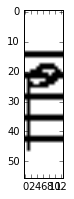

ratioLeft = [ 0.]; ratioRight = [ 3.76315789]; ratioLR = [ 0.]; type = 0


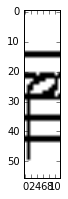

ratioLeft = [ 0.]; ratioRight = [ 3.]; ratioLR = [ 0.]; type = 0


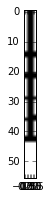

ratioLeft = [ 0.]; ratioRight = [ 0.10227273]; ratioLR = [ 0.]; type = 0


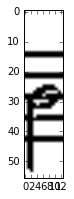

ratioLeft = [ 0.]; ratioRight = [ 2.18644068]; ratioLR = [ 0.]; type = 0


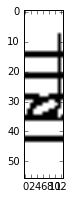

ratioLeft = [ 2.57142857]; ratioRight = [ 0.23809524]; ratioLR = [ 10.8]; type = 0


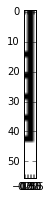

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


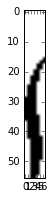

ratioLeft = [ 0.25714286]; ratioRight = [ 0.55714286]; ratioLR = [ 0.46153846]; type = 0


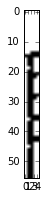

ratioLeft = [ 0.]; ratioRight = [ 0.225]; ratioLR = [ 0.]; type = 0


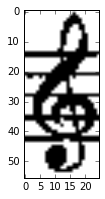

ratioLeft = [ 2.79104478]; ratioRight = [ 4.08955224]; ratioLR = [ 0.68248175]; type = 0


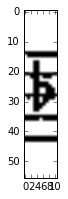

ratioLeft = [ 0.39130435]; ratioRight = [ 1.56521739]; ratioLR = [ 0.25]; type = 0


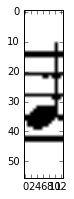

ratioLeft = [ 2.55]; ratioRight = [ 0.45]; ratioLR = [ 5.66666667]; type = 0


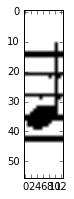

ratioLeft = [ 2.61538462]; ratioRight = [ 0.46153846]; ratioLR = [ 5.66666667]; type = 0


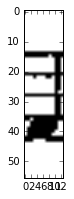

ratioLeft = [ 2.475]; ratioRight = [ 0.8]; ratioLR = [ 3.09375]; type = 0


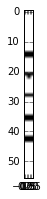

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


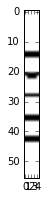

ratioLeft = [ 0.5]; ratioRight = [ 0.44444444]; ratioLR = [ 1.125]; type = 0


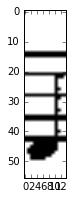

ratioLeft = [ 2.625]; ratioRight = [ 0.75]; ratioLR = [ 3.5]; type = 0


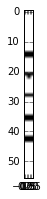

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


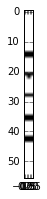

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


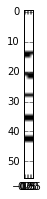

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


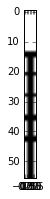

ratioLeft = [ 0.]; ratioRight = [ 0.0952381]; ratioLR = [ 0.]; type = 0


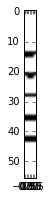

ratioLeft = [ 0.]; ratioRight = [ 0.38888889]; ratioLR = [ 0.]; type = 0


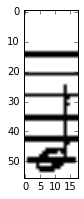

ratioLeft = [ 3.33333333]; ratioRight = [ 0.97619048]; ratioLR = [ 3.41463415]; type = 0


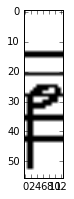

ratioLeft = [ 0.]; ratioRight = [ 2.05263158]; ratioLR = [ 0.]; type = 0


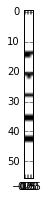

ratioLeft = [ 0.]; ratioRight = [ 0.41176471]; ratioLR = [ 0.]; type = 0


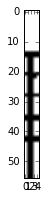

ratioLeft = [ 0.]; ratioRight = [ 0.20238095]; ratioLR = [ 0.]; type = 0


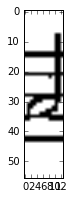

ratioLeft = [ 2.]; ratioRight = [ 0.85365854]; ratioLR = [ 2.34285714]; type = 0


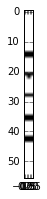

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


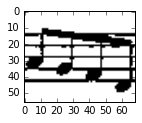

ratioLeft = [ 19.41304348]; ratioRight = [ 0.89130435]; ratioLR = [ 21.7804878]; type = 0


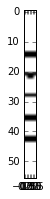

ratioLeft = [ 0.]; ratioRight = [ 0.44444444]; ratioLR = [ 0.]; type = 0


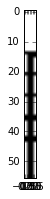

ratioLeft = [ 0.]; ratioRight = [ 0.0952381]; ratioLR = [ 0.]; type = 0


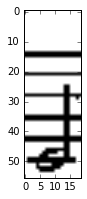

ratioLeft = [ 2.62068966]; ratioRight = [ 0.63793103]; ratioLR = [ 4.10810811]; type = 0


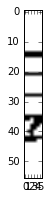

ratioLeft = [ 0.40909091]; ratioRight = [ 0.77272727]; ratioLR = [ 0.52941176]; type = 0


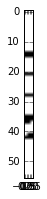

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


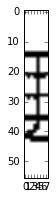

ratioLeft = [ 0.51219512]; ratioRight = [ 0.63414634]; ratioLR = [ 0.80769231]; type = 0


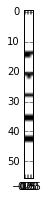

ratioLeft = [ 0.]; ratioRight = [ 0.41176471]; ratioLR = [ 0.]; type = 0


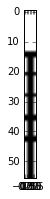

ratioLeft = [ 0.]; ratioRight = [ 0.0952381]; ratioLR = [ 0.]; type = 0


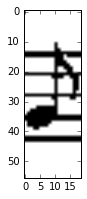

ratioLeft = [ 2.46341463]; ratioRight = [ 2.29268293]; ratioLR = [ 1.07446809]; type = 0


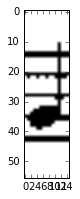

ratioLeft = [ 2.73170732]; ratioRight = [ 0.65853659]; ratioLR = [ 4.14814815]; type = 0


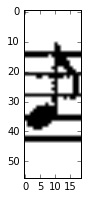

ratioLeft = [ 2.28888889]; ratioRight = [ 2.24444444]; ratioLR = [ 1.01980198]; type = 0


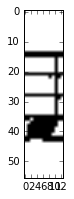

ratioLeft = [ 2.53846154]; ratioRight = [ 0.46153846]; ratioLR = [ 5.5]; type = 0


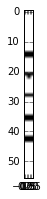

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


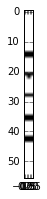

ratioLeft = [ 0.]; ratioRight = [ 0.47058824]; ratioLR = [ 0.]; type = 0


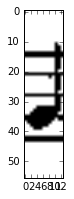

ratioLeft = [ 2.63157895]; ratioRight = [ 0.84210526]; ratioLR = [ 3.125]; type = 0


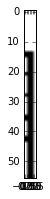

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


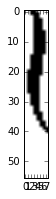

ratioLeft = [ 0.38028169]; ratioRight = [ 0.52112676]; ratioLR = [ 0.72972973]; type = 0


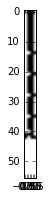

ratioLeft = [ 0.]; ratioRight = [ 0.0625]; ratioLR = [ 0.]; type = 0


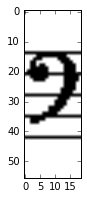

ratioLeft = [ 3.58823529]; ratioRight = [ 1.67647059]; ratioLR = [ 2.14035088]; type = 0


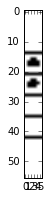

ratioLeft = [ 0.40909091]; ratioRight = [ 0.59090909]; ratioLR = [ 0.69230769]; type = 0


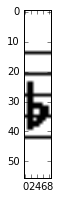

ratioLeft = [ 0.]; ratioRight = [ 1.36842105]; ratioLR = [ 0.]; type = 0


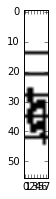

ratioLeft = [ 1.76666667]; ratioRight = [ 0.16666667]; ratioLR = [ 10.6]; type = 0


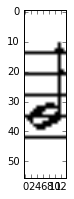

ratioLeft = [ 2.16216216]; ratioRight = [ 0.32432432]; ratioLR = [ 6.66666667]; type = 0


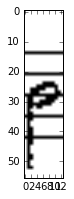

ratioLeft = [ 0.]; ratioRight = [ 3.375]; ratioLR = [ 0.]; type = 0


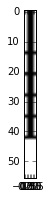

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


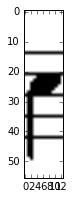

ratioLeft = [ 0.]; ratioRight = [ 1.86538462]; ratioLR = [ 0.]; type = 0


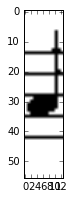

ratioLeft = [ 2.12820513]; ratioRight = [ 0.30769231]; ratioLR = [ 6.91666667]; type = 0


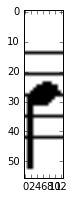

ratioLeft = [ 0.]; ratioRight = [ 1.72727273]; ratioLR = [ 0.]; type = 0


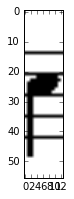

ratioLeft = [ 0.]; ratioRight = [ 1.72727273]; ratioLR = [ 0.]; type = 0


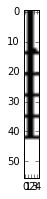

ratioLeft = [ 0.]; ratioRight = [ 0.12790698]; ratioLR = [ 0.]; type = 0


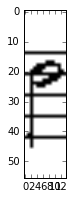

ratioLeft = [ 0.]; ratioRight = [ 2.84848485]; ratioLR = [ 0.]; type = 0


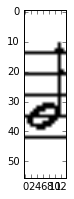

ratioLeft = [ 2.27777778]; ratioRight = [ 0.33333333]; ratioLR = [ 6.83333333]; type = 0


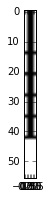

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


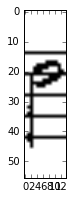

ratioLeft = [ 0.]; ratioRight = [ 2.74285714]; ratioLR = [ 0.]; type = 0


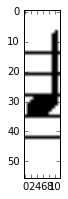

ratioLeft = [ 1.55555556]; ratioRight = [ 0.09259259]; ratioLR = [ 16.8]; type = 0


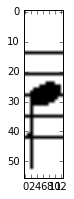

ratioLeft = [ 0.]; ratioRight = [ 2.88235294]; ratioLR = [ 0.]; type = 0


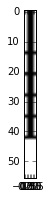

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


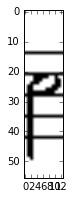

ratioLeft = [ 0.]; ratioRight = [ 1.46296296]; ratioLR = [ 0.]; type = 0


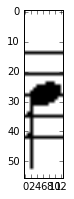

ratioLeft = [ 0.]; ratioRight = [ 2.82857143]; ratioLR = [ 0.]; type = 0


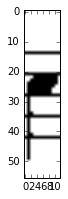

ratioLeft = [ 0.]; ratioRight = [ 3.03030303]; ratioLR = [ 0.]; type = 0


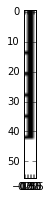

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


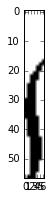

ratioLeft = [ 0.26760563]; ratioRight = [ 0.52112676]; ratioLR = [ 0.51351351]; type = 0


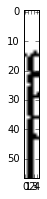

ratioLeft = [ 0.]; ratioRight = [ 0.1875]; ratioLR = [ 0.]; type = 0


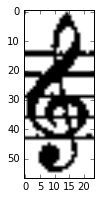

ratioLeft = [ 2.36764706]; ratioRight = [ 3.94117647]; ratioLR = [ 0.60074627]; type = 0


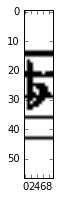

ratioLeft = [ 0.]; ratioRight = [ 3.25]; ratioLR = [ 0.]; type = 0


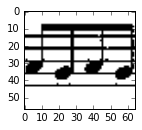

ratioLeft = [ 19.86666667]; ratioRight = [ 0.62222222]; ratioLR = [ 31.92857143]; type = 0


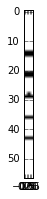

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


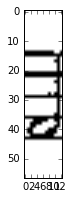

ratioLeft = [ 2.3]; ratioRight = [ 0.175]; ratioLR = [ 13.14285714]; type = 0


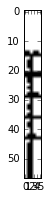

ratioLeft = [ 0.]; ratioRight = [ 0.31081081]; ratioLR = [ 0.]; type = 0


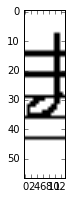

ratioLeft = [ 2.10526316]; ratioRight = [ 1.07894737]; ratioLR = [ 1.95121951]; type = 0


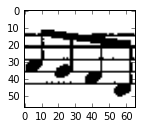

ratioLeft = [ 17.65957447]; ratioRight = [ 0.78723404]; ratioLR = [ 22.43243243]; type = 0


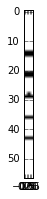

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


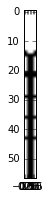

ratioLeft = [ 0.]; ratioRight = [ 0.08333333]; ratioLR = [ 0.]; type = 0


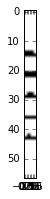

ratioLeft = [ 0.]; ratioRight = [ 0.875]; ratioLR = [ 0.]; type = 0


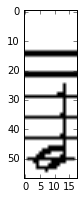

ratioLeft = [ 2.69565217]; ratioRight = [ 0.67391304]; ratioLR = [ 4.]; type = 0


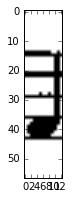

ratioLeft = [ 2.68421053]; ratioRight = [ 0.84210526]; ratioLR = [ 3.1875]; type = 0


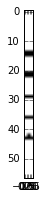

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


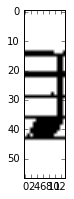

ratioLeft = [ 2.84210526]; ratioRight = [ 0.84210526]; ratioLR = [ 3.375]; type = 0


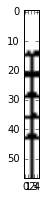

ratioLeft = [ 0.]; ratioRight = [ 0.33333333]; ratioLR = [ 0.]; type = 0


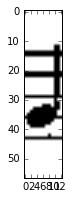

ratioLeft = [ 2.75675676]; ratioRight = [ 0.81081081]; ratioLR = [ 3.4]; type = 0


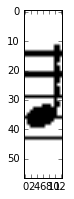

ratioLeft = [ 2.72972973]; ratioRight = [ 0.72972973]; ratioLR = [ 3.74074074]; type = 0


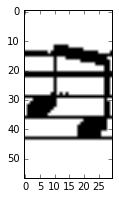

ratioLeft = [ 7.975]; ratioRight = [ 0.7]; ratioLR = [ 11.39285714]; type = 0


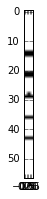

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


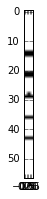

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


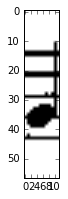

ratioLeft = [ 2.71052632]; ratioRight = [ 0.18421053]; ratioLR = [ 14.71428571]; type = 0


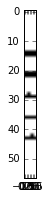

ratioLeft = [ 0.]; ratioRight = [ 0.4375]; ratioLR = [ 0.]; type = 0


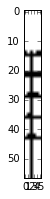

ratioLeft = [ 0.]; ratioRight = [ 0.44230769]; ratioLR = [ 0.]; type = 0


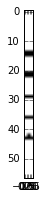

ratioLeft = [ 0.]; ratioRight = [ 0.46666667]; ratioLR = [ 0.]; type = 0


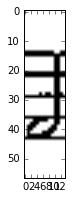

ratioLeft = [ 2.2972973]; ratioRight = [ 1.08108108]; ratioLR = [ 2.125]; type = 0


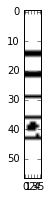

ratioLeft = [ 0.45]; ratioRight = [ 0.8]; ratioLR = [ 0.5625]; type = 0


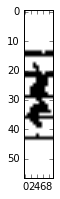

ratioLeft = [ 0.51162791]; ratioRight = [ 1.48837209]; ratioLR = [ 0.34375]; type = 0


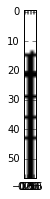

ratioLeft = [ 0.]; ratioRight = [ 0.07058824]; ratioLR = [ 0.]; type = 0


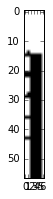

ratioLeft = [ 1.0952381]; ratioRight = [ 0.]; ratioLR = [ inf]; type = 0


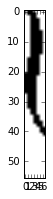

ratioLeft = [ 0.26388889]; ratioRight = [ 0.52777778]; ratioLR = [ 0.5]; type = 0


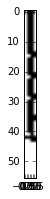

ratioLeft = [ 0.]; ratioRight = [ 0.12048193]; ratioLR = [ 0.]; type = 0


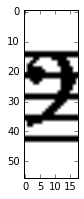

ratioLeft = [ 3.74358974]; ratioRight = [ 2.]; ratioLR = [ 1.87179487]; type = 0


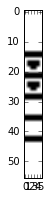

ratioLeft = [ 0.4375]; ratioRight = [ 0.75]; ratioLR = [ 0.58333333]; type = 0


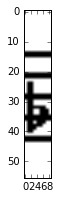

ratioLeft = [ 0.]; ratioRight = [ 1.67391304]; ratioLR = [ 0.]; type = 0


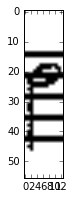

ratioLeft = [ 0.]; ratioRight = [ 2.77083333]; ratioLR = [ 0.]; type = 0


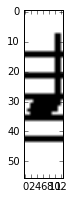

ratioLeft = [ 2.61363636]; ratioRight = [ 0.86363636]; ratioLR = [ 3.02631579]; type = 0


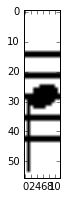

ratioLeft = [ 0.]; ratioRight = [ 3.5]; ratioLR = [ 0.]; type = 0


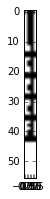

ratioLeft = [ 0.]; ratioRight = [ 0.13333333]; ratioLR = [ 0.]; type = 0


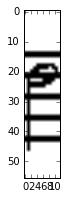

ratioLeft = [ 0.]; ratioRight = [ 3.5]; ratioLR = [ 0.]; type = 0


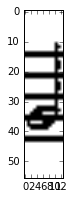

ratioLeft = [ 2.75609756]; ratioRight = [ 0.68292683]; ratioLR = [ 4.03571429]; type = 0


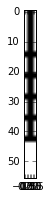

ratioLeft = [ 0.]; ratioRight = [ 0.11363636]; ratioLR = [ 0.]; type = 0


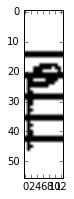

ratioLeft = [ 0.]; ratioRight = [ 4.07894737]; ratioLR = [ 0.]; type = 0


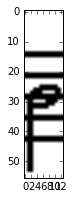

ratioLeft = [ 0.]; ratioRight = [ 2.2295082]; ratioLR = [ 0.]; type = 0


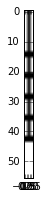

ratioLeft = [ 0.]; ratioRight = [ 0.18518519]; ratioLR = [ 0.]; type = 0


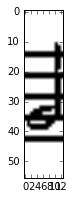

ratioLeft = [ 2.775]; ratioRight = [ 0.9]; ratioLR = [ 3.08333333]; type = 0


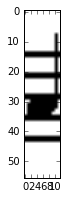

ratioLeft = [ 2.76744186]; ratioRight = [ 0.23255814]; ratioLR = [ 11.9]; type = 0


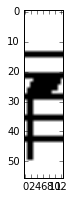

ratioLeft = [ 0.]; ratioRight = [ 2.4137931]; ratioLR = [ 0.]; type = 0


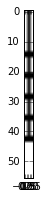

ratioLeft = [ 0.]; ratioRight = [ 0.18518519]; ratioLR = [ 0.]; type = 0


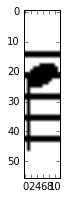

ratioLeft = [ 0.]; ratioRight = [ 3.65789474]; ratioLR = [ 0.]; type = 0


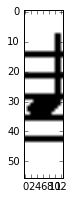

ratioLeft = [ 2.69767442]; ratioRight = [ 0.88372093]; ratioLR = [ 3.05263158]; type = 0


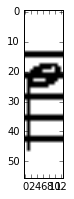

ratioLeft = [ 0.]; ratioRight = [ 3.92105263]; ratioLR = [ 0.]; type = 0


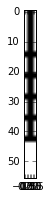

ratioLeft = [ 0.]; ratioRight = [ 0.11363636]; ratioLR = [ 0.]; type = 0


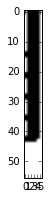

ratioLeft = [ 0.5]; ratioRight = [ 0.48863636]; ratioLR = [ 1.02325581]; type = 0


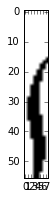

ratioLeft = [ 0.37142857]; ratioRight = [ 0.54285714]; ratioLR = [ 0.68421053]; type = 0


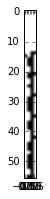

ratioLeft = [ 0.]; ratioRight = [ 0.07692308]; ratioLR = [ 0.]; type = 0


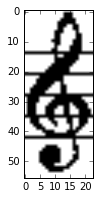

ratioLeft = [ 2.21212121]; ratioRight = [ 3.77272727]; ratioLR = [ 0.58634538]; type = 0


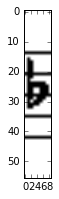

ratioLeft = [ 0.]; ratioRight = [ 2.8]; ratioLR = [ 0.]; type = 0


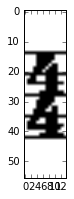

ratioLeft = [ 2.41509434]; ratioRight = [ 0.88679245]; ratioLR = [ 2.72340426]; type = 0


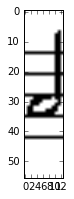

ratioLeft = [ 1.38888889]; ratioRight = [ 0.09259259]; ratioLR = [ 15.]; type = 0


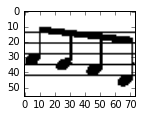

ratioLeft = [ 20.34146341]; ratioRight = [ 0.26829268]; ratioLR = [ 75.81818182]; type = 0


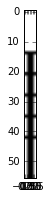

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


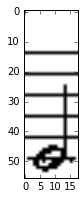

ratioLeft = [ 2.78378378]; ratioRight = [ 0.64864865]; ratioLR = [ 4.29166667]; type = 0


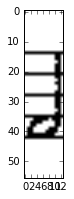

ratioLeft = [ 1.53061224]; ratioRight = [ 0.10204082]; ratioLR = [ 15.]; type = 0


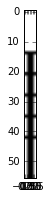

ratioLeft = [ 0.]; ratioRight = [ 0.05952381]; ratioLR = [ 0.]; type = 0


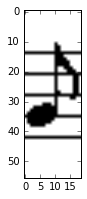

ratioLeft = [ 2.42857143]; ratioRight = [ 2.17142857]; ratioLR = [ 1.11842105]; type = 0


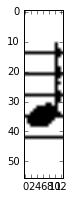

ratioLeft = [ 2.34285714]; ratioRight = [ 0.57142857]; ratioLR = [ 4.1]; type = 0


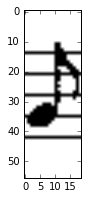

ratioLeft = [ 2.37142857]; ratioRight = [ 2.31428571]; ratioLR = [ 1.02469136]; type = 0


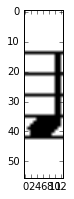

ratioLeft = [ 2.16216216]; ratioRight = [ 0.83783784]; ratioLR = [ 2.58064516]; type = 0


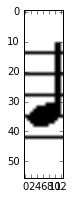

ratioLeft = [ 2.10526316]; ratioRight = [ 0.81578947]; ratioLR = [ 2.58064516]; type = 0


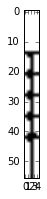

ratioLeft = [ 0.]; ratioRight = [ 0.19642857]; ratioLR = [ 0.]; type = 0


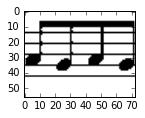

ratioLeft = [ 19.97674419]; ratioRight = [ 0.11627907]; ratioLR = [ 171.8]; type = 0


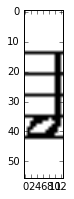

ratioLeft = [ 1.71052632]; ratioRight = [ 0.81578947]; ratioLR = [ 2.09677419]; type = 0


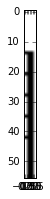

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


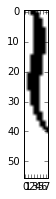

ratioLeft = [ 0.35211268]; ratioRight = [ 0.53521127]; ratioLR = [ 0.65789474]; type = 0


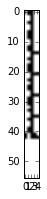

ratioLeft = [ 0.]; ratioRight = [ 0.16923077]; ratioLR = [ 0.]; type = 0


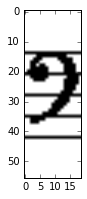

ratioLeft = [ 3.84375]; ratioRight = [ 1.875]; ratioLR = [ 2.05]; type = 0


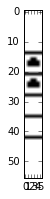

ratioLeft = [ 0.40909091]; ratioRight = [ 0.63636364]; ratioLR = [ 0.64285714]; type = 0


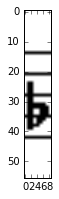

ratioLeft = [ 0.]; ratioRight = [ 1.36842105]; ratioLR = [ 0.]; type = 0


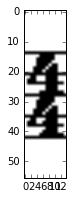

ratioLeft = [ 2.24074074]; ratioRight = [ 0.85185185]; ratioLR = [ 2.63043478]; type = 0


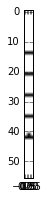

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


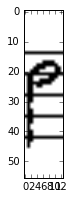

ratioLeft = [ 0.]; ratioRight = [ 3.48387097]; ratioLR = [ 0.]; type = 0


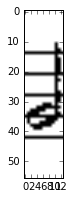

ratioLeft = [ 2.14285714]; ratioRight = [ 0.62857143]; ratioLR = [ 3.40909091]; type = 0


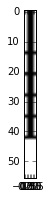

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


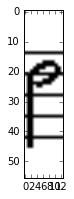

ratioLeft = [ 0.]; ratioRight = [ 1.62264151]; ratioLR = [ 0.]; type = 0


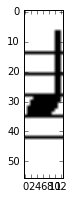

ratioLeft = [ 2.21052632]; ratioRight = [ 0.81578947]; ratioLR = [ 2.70967742]; type = 0


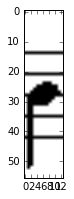

ratioLeft = [ 0.]; ratioRight = [ 1.75925926]; ratioLR = [ 0.]; type = 0


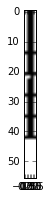

ratioLeft = [ 0.]; ratioRight = [ 0.05882353]; ratioLR = [ 0.]; type = 0


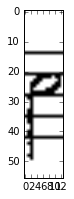

ratioLeft = [ 0.]; ratioRight = [ 1.9047619]; ratioLR = [ 0.]; type = 0


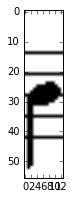

ratioLeft = [ 0.]; ratioRight = [ 1.81481481]; ratioLR = [ 0.]; type = 0


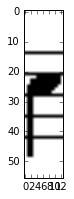

ratioLeft = [ 0.]; ratioRight = [ 1.7962963]; ratioLR = [ 0.]; type = 0


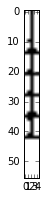

ratioLeft = [ 0.]; ratioRight = [ 0.21818182]; ratioLR = [ 0.]; type = 0


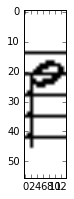

ratioLeft = [ 0.]; ratioRight = [ 2.79411765]; ratioLR = [ 0.]; type = 0


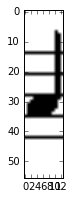

ratioLeft = [ 2.23684211]; ratioRight = [ 0.76315789]; ratioLR = [ 2.93103448]; type = 0


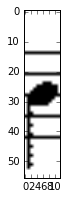

ratioLeft = [ 0.]; ratioRight = [ 3.25]; ratioLR = [ 0.]; type = 0


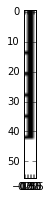

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


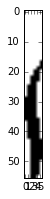

ratioLeft = [ 0.25714286]; ratioRight = [ 0.48571429]; ratioLR = [ 0.52941176]; type = 0


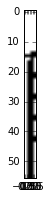

ratioLeft = [ 0.]; ratioRight = [ 0.12195122]; ratioLR = [ 0.]; type = 0


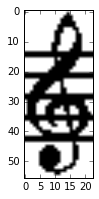

ratioLeft = [ 2.48571429]; ratioRight = [ 4.08571429]; ratioLR = [ 0.60839161]; type = 0


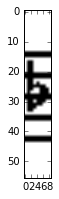

ratioLeft = [ 0.]; ratioRight = [ 3.03030303]; ratioLR = [ 0.]; type = 0


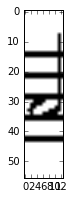

ratioLeft = [ 2.53488372]; ratioRight = [ 0.23255814]; ratioLR = [ 10.9]; type = 0


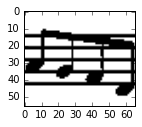

ratioLeft = [ 20.625]; ratioRight = [ 0.8125]; ratioLR = [ 25.38461538]; type = 0


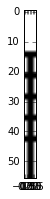

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


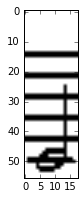

ratioLeft = [ 3.6]; ratioRight = [ 1.]; ratioLR = [ 3.6]; type = 0


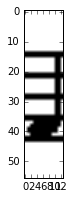

ratioLeft = [ 2.69767442]; ratioRight = [ 0.86046512]; ratioLR = [ 3.13513514]; type = 0


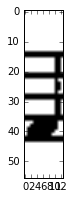

ratioLeft = [ 2.78571429]; ratioRight = [ 0.78571429]; ratioLR = [ 3.54545455]; type = 0


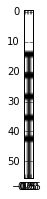

ratioLeft = [ 0.]; ratioRight = [ 0.19230769]; ratioLR = [ 0.]; type = 0


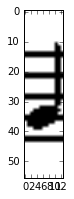

ratioLeft = [ 2.73809524]; ratioRight = [ 0.83333333]; ratioLR = [ 3.28571429]; type = 0


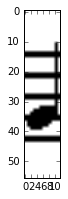

ratioLeft = [ 2.82926829]; ratioRight = [ 0.24390244]; ratioLR = [ 11.6]; type = 0


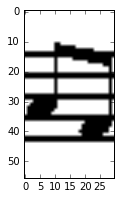

ratioLeft = [ 8.93181818]; ratioRight = [ 0.22727273]; ratioLR = [ 39.3]; type = 0


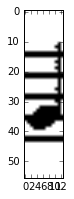

ratioLeft = [ 2.7826087]; ratioRight = [ 0.2173913]; ratioLR = [ 12.8]; type = 0


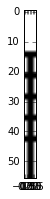

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


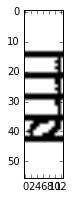

ratioLeft = [ 2.24489796]; ratioRight = [ 0.20408163]; ratioLR = [ 11.]; type = 0


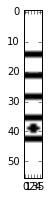

ratioLeft = [ 0.42307692]; ratioRight = [ 0.80769231]; ratioLR = [ 0.52380952]; type = 0


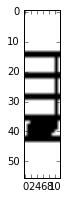

ratioLeft = [ 2.83333333]; ratioRight = [ 0.23809524]; ratioLR = [ 11.9]; type = 0


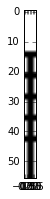

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


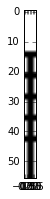

ratioLeft = [ 0.]; ratioRight = [ 0.11904762]; ratioLR = [ 0.]; type = 0


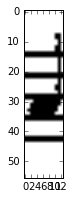

ratioLeft = [ 2.70833333]; ratioRight = [ 0.20833333]; ratioLR = [ 13.]; type = 0


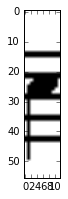

ratioLeft = [ 0.]; ratioRight = [ 3.61538462]; ratioLR = [ 0.]; type = 0


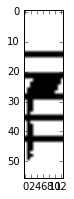

ratioLeft = [ 0.]; ratioRight = [ 4.39473684]; ratioLR = [ 0.]; type = 0


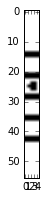

ratioLeft = [ 0.42307692]; ratioRight = [ 0.38461538]; ratioLR = [ 1.1]; type = 0


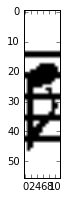

ratioLeft = [ 0.]; ratioRight = [ 2.69642857]; ratioLR = [ 0.]; type = 0


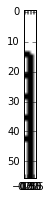

ratioLeft = [ 0.]; ratioRight = [ 0.78846154]; ratioLR = [ 0.]; type = 0


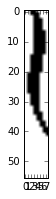

ratioLeft = [ 0.36619718]; ratioRight = [ 0.53521127]; ratioLR = [ 0.68421053]; type = 0


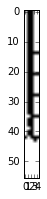

ratioLeft = [ 0.]; ratioRight = [ 0.13253012]; ratioLR = [ 0.]; type = 0


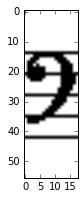

ratioLeft = [ 3.41176471]; ratioRight = [ 1.73529412]; ratioLR = [ 1.96610169]; type = 0


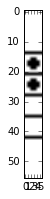

ratioLeft = [ 0.34615385]; ratioRight = [ 0.53846154]; ratioLR = [ 0.64285714]; type = 0


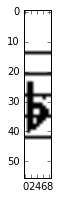

ratioLeft = [ 0.]; ratioRight = [ 2.84]; ratioLR = [ 0.]; type = 0


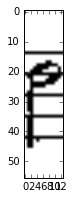

ratioLeft = [ 0.]; ratioRight = [ 1.85416667]; ratioLR = [ 0.]; type = 0


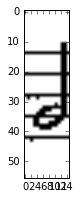

ratioLeft = [ 2.45714286]; ratioRight = [ 0.88571429]; ratioLR = [ 2.77419355]; type = 0


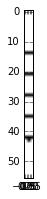

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


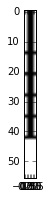

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


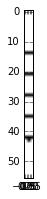

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


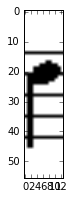

ratioLeft = [ 0.]; ratioRight = [ 1.84615385]; ratioLR = [ 0.]; type = 0


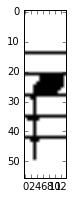

ratioLeft = [ 0.17142857]; ratioRight = [ 2.88571429]; ratioLR = [ 0.05940594]; type = 0


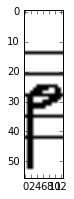

ratioLeft = [ 0.]; ratioRight = [ 1.6]; ratioLR = [ 0.]; type = 0


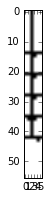

ratioLeft = [ 0.]; ratioRight = [ 0.40816327]; ratioLR = [ 0.]; type = 0


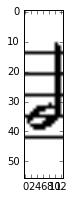

ratioLeft = [ 2.05714286]; ratioRight = [ 0.85714286]; ratioLR = [ 2.4]; type = 0


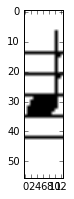

ratioLeft = [ 2.21052632]; ratioRight = [ 0.31578947]; ratioLR = [ 7.]; type = 0


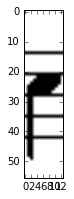

ratioLeft = [ 0.]; ratioRight = [ 1.7962963]; ratioLR = [ 0.]; type = 0


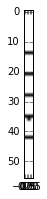

ratioLeft = [ 0.]; ratioRight = [ 0.45454545]; ratioLR = [ 0.]; type = 0


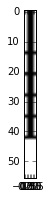

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


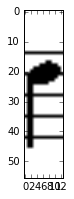

ratioLeft = [ 0.]; ratioRight = [ 1.81132075]; ratioLR = [ 0.]; type = 0


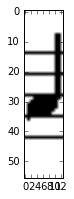

ratioLeft = [ 2.32432432]; ratioRight = [ 0.78378378]; ratioLR = [ 2.96551724]; type = 0


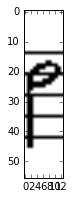

ratioLeft = [ 0.]; ratioRight = [ 1.65384615]; ratioLR = [ 0.]; type = 0


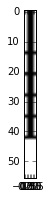

ratioLeft = [ 0.]; ratioRight = [ 0.05813953]; ratioLR = [ 0.]; type = 0


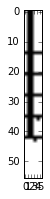

ratioLeft = [ 0.]; ratioRight = [ 0.19767442]; ratioLR = [ 0.]; type = 0


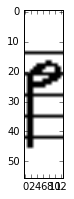

ratioLeft = [ 0.]; ratioRight = [ 1.67924528]; ratioLR = [ 0.]; type = 0


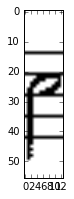

ratioLeft = [ 0.]; ratioRight = [ 3.38709677]; ratioLR = [ 0.]; type = 0


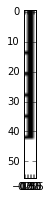

ratioLeft = [ 0.]; ratioRight = [ 0.]; ratioLR = [ nan]; type = 0


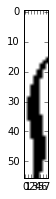

ratioLeft = [ 0.37142857]; ratioRight = [ 0.52857143]; ratioLR = [ 0.7027027]; type = 0


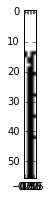

ratioLeft = [ 0.]; ratioRight = [ 0.0617284]; ratioLR = [ 0.]; type = 0


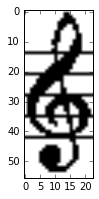

ratioLeft = [ 2.19402985]; ratioRight = [ 3.70149254]; ratioLR = [ 0.59274194]; type = 0


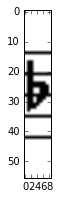

ratioLeft = [ 0.]; ratioRight = [ 2.88]; ratioLR = [ 0.]; type = 0


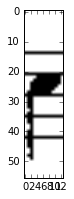

ratioLeft = [ 0.]; ratioRight = [ 2.06382979]; ratioLR = [ 0.]; type = 0


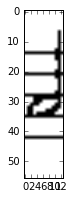

ratioLeft = [ 1.72093023]; ratioRight = [ 0.11627907]; ratioLR = [ 14.8]; type = 0


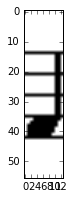

ratioLeft = [ 2.36111111]; ratioRight = [ 0.80555556]; ratioLR = [ 2.93103448]; type = 0


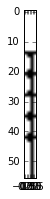

ratioLeft = [ 0.]; ratioRight = [ 0.09090909]; ratioLR = [ 0.]; type = 0


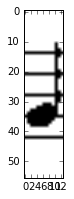

ratioLeft = [ 2.42857143]; ratioRight = [ 0.48571429]; ratioLR = [ 5.]; type = 0


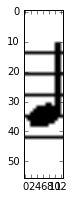

ratioLeft = [ 2.18918919]; ratioRight = [ 0.83783784]; ratioLR = [ 2.61290323]; type = 0


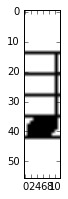

ratioLeft = [ 2.2972973]; ratioRight = [ 0.13513514]; ratioLR = [ 17.]; type = 0


KeyboardInterrupt: 

In [6]:
import numpy
import cv2
import math
from matplotlib import pyplot as plt

# Load an color image in grayscale
img_l = cv2.imread('notes001.jpg')
img_t = cv2.cvtColor(img_l, cv2.COLOR_BGR2GRAY)
tmp, img = cv2.threshold(img_t,200,255,cv2.THRESH_BINARY)

ns = NotesShet(img)

for Acc in ns.accolade:
    #plt.rcParams["figure.figsize"] = [2, 3]
    #plt.imshow(Acc.image,cmap='gray' )
    #plt.show()
    for Ln in Acc.line:
        #plt.rcParams["figure.figsize"] = [2, 3]
        #plt.imshow(Ln.image,cmap='gray' )
        #plt.show()
        for Nt in Ln.note:
            plt.rcParams["figure.figsize"] = [2, 3]
            plt.imshow(Nt.image,cmap='gray' )
            plt.show()
            s = 'ratioLeft = ' + str(Nt.ratioLeft) + '; ratioRight = ' +str(Nt.ratioRight) + '; ratioLR = ' +str(Nt.ratioLR) + '; type = '+str(Nt.type)
            print(s)
            
print('end')
            
            




In [4]:
plt.rcParams["figure.figsize"] = [18.0, 12.0]
plt.imshow(out[0],cmap='gray' )
plt.show()



NameError: name 'out' is not defined